# DATOS DEL JUGADOR 6 PARA EL ACELEROMETRO

In [1]:
#librerias
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import numpy as np
from scipy.signal import detrend
from fastdtw import dtw
import csv
from scipy.ndimage import gaussian_filter
import win32api
from scipy.signal import savgol_filter
from scipy.signal import medfilt
import pywt
from scipy.signal import detrend


In [2]:
# #El proceso puede requerir mas memoria de la que se dispone por lo que se amplia

# # Obtener el límite de uso de memoria virtual actual (en bytes)
# current_limit = win32api.GetProcessMemoryInfo(win32api.GetCurrentProcess())['PagefileUsage']
# print("Límite de uso de memoria virtual actual (en bytes):", current_limit)

# # Establecer un nuevo límite de uso de memoria virtual (en bytes)
# # Por ejemplo, establecer el límite en 20 GB (20 * 1024 * 1024 * 1024 bytes)
# new_limit = 20 * 1024 * 1024 * 1024
# win32api.SetProcessWorkingSetSize(win32api.GetCurrentProcess(), -1, new_limit)

# # Verificar que el límite de uso de memoria virtual se haya actualizado
# current_limit = win32api.GetProcessMemoryInfo(win32api.GetCurrentProcess())['PagefileUsage']
# print("Nuevo límite de uso de memoria virtual (en bytes):", current_limit)


In [3]:
#lectura como dataframe de todos los golpes del jugador 1 del acelerometro
df_dreta = pd.read_csv('C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 6/Enregistraments J6/J6 DRETES ACC.csv')
df_reves = pd.read_csv('C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 6/Enregistraments J6/J6 REVES ACC.csv')
df_serve = pd.read_csv('C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 6/Enregistraments J6/J6 SERVE ACC.csv')
df_smash = pd.read_csv('C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 6/Enregistraments J6/J6 SMASH ACC.csv')
df_vd = pd.read_csv('C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 6/Enregistraments J6/J6 VD ACC.csv')
df_vr = pd.read_csv('C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 6/Enregistraments J6/J6 VR ACC.csv')


In [4]:
#visualizamos las primeras lineas del dataframe
df_reves.head()

ACC_X     ACC_Y     ACC_Z                         DATE  UNIX_TIMESTAMP
0  0.009410  0.012715  0.019145  2023-10-21T15:49:18.841964Z   1697903358841
1  0.014254  0.020130  0.030308  2023-10-21T15:49:18.862220Z   1697903358862
2  0.023357  0.034649  0.052955  2023-10-21T15:49:18.882469Z   1697903358882
3  0.018666  0.030274  0.046377  2023-10-21T15:49:18.903218Z   1697903358903
4  0.081505  0.132759  0.219068  2023-10-21T15:49:18.922964Z   1697903358922

In [5]:
df_dreta.head()

ACC_X     ACC_Y     ACC_Z                         DATE  UNIX_TIMESTAMP
0  0.239379 -0.578486 -0.576484  2023-10-21T15:47:05.818675Z   1697903225818
1  0.066844 -0.165919 -0.161527  2023-10-21T15:47:05.839032Z   1697903225839
2 -0.092988  0.230628  0.215637  2023-10-21T15:47:05.859155Z   1697903225859
3 -0.273147  0.650547  0.607209  2023-10-21T15:47:05.881560Z   1697903225881
4 -0.481073  1.111470  1.086667  2023-10-21T15:47:05.899785Z   1697903225899

In [6]:
df_serve.head()

ACC_X     ACC_Y     ACC_Z                         DATE  UNIX_TIMESTAMP
0  0.069779  0.091425  0.128851  2023-10-21T15:59:51.041637Z   1697903991041
1  0.112370  0.145314  0.209248  2023-10-21T15:59:51.062021Z   1697903991061
2  0.087677  0.111961  0.165234  2023-10-21T15:59:51.082316Z   1697903991082
3  0.074598  0.094290  0.141612  2023-10-21T15:59:51.102584Z   1697903991102
4  0.043806  0.054323  0.082739  2023-10-21T15:59:51.122789Z   1697903991122

In [7]:
df_smash.head()

ACC_X     ACC_Y     ACC_Z                         DATE  UNIX_TIMESTAMP
0 -0.012902 -0.026195 -0.043456  2023-10-21T15:58:21.149766Z   1697903901149
1 -0.015520 -0.030772 -0.051455  2023-10-21T15:58:21.169926Z   1697903901169
2 -0.022704 -0.044484 -0.075274  2023-10-21T15:58:21.190754Z   1697903901190
3 -0.000210 -0.000405 -0.000693  2023-10-21T15:58:21.210557Z   1697903901210
4 -0.002072 -0.003996 -0.006915  2023-10-21T15:58:21.230821Z   1697903901230

In [8]:
df_vd.head()

ACC_X     ACC_Y     ACC_Z                         DATE  UNIX_TIMESTAMP
0 -0.169415  0.267451  0.333416  2023-10-21T15:55:09.937115Z   1697903709937
1 -0.419250  0.647605  0.812356  2023-10-21T15:55:09.958339Z   1697903709958
2 -0.768978  1.100982  1.329659  2023-10-21T15:55:09.977625Z   1697903709977
3 -0.993526  1.449609  1.775852  2023-10-21T15:55:09.997980Z   1697903709997
4 -0.933211  1.564777  1.976371  2023-10-21T15:55:10.018213Z   1697903710018

In [9]:
df_vr.head()

ACC_X     ACC_Y     ACC_Z                         DATE  UNIX_TIMESTAMP
0  0.172256  0.259375  0.401807  2023-10-21T15:56:19.528119Z   1697903779528
1 -0.036895 -0.053644 -0.078355  2023-10-21T15:56:19.548433Z   1697903779548
2 -0.090325 -0.127883 -0.189365  2023-10-21T15:56:19.568705Z   1697903779568
3  0.033422  0.049108  0.077146  2023-10-21T15:56:19.588824Z   1697903779588
4  0.086913  0.138749  0.220652  2023-10-21T15:56:19.609209Z   1697903779609

In [10]:
#eliminamos la columna Date de todos los df ya que solo usaremos el Unixtimestamp
df_dreta = df_dreta.drop(columns=['DATE'])
df_reves = df_reves.drop(columns=['DATE'])
df_serve = df_serve.drop(columns=['DATE'])
df_smash = df_smash.drop(columns=['DATE'])
df_vd = df_vd.drop(columns=['DATE'])
df_vr = df_vr.drop(columns=['DATE'])

In [11]:
#vemos efectivamente que la columna se ha eliminado
df_dreta.head()

ACC_X     ACC_Y     ACC_Z  UNIX_TIMESTAMP
0  0.239379 -0.578486 -0.576484   1697903225818
1  0.066844 -0.165919 -0.161527   1697903225839
2 -0.092988  0.230628  0.215637   1697903225859
3 -0.273147  0.650547  0.607209   1697903225881
4 -0.481073  1.111470  1.086667   1697903225899

In [12]:
#busqueda NAs y Nulos

In [13]:
# Convertir el diccionario a un DataFrame
df = pd.DataFrame(df_dreta)

# Buscar NaNs
nan_count = df.isna().sum()

# Buscar ceros
zero_count = (df == 0).sum()

# Mostrar resultados
print("Conteo de valores NaN por columna:")
print(nan_count)
print("\nConteo de ceros por columna:")
print(zero_count)

Conteo de valores NaN por columna:
ACC_X             0
ACC_Y             0
ACC_Z             0
UNIX_TIMESTAMP    0
dtype: int64

Conteo de ceros por columna:
ACC_X             0
ACC_Y             0
ACC_Z             0
UNIX_TIMESTAMP    0
dtype: int64


In [14]:
#Outliers

In [15]:

# Convertir el diccionario a un DataFrame
df = pd.DataFrame(df_dreta)

# Función para detectar outliers usando el método IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Detectar outliers en cada columna
outliers_acc_z = detect_outliers_iqr(df['ACC_Z'])

# Mostrar resultados
print("Outliers en ACC_Z:")
print(outliers_acc_z)
print(len(outliers_acc_z))


Outliers en ACC_Z:
5       1.621910
6       1.974841
7       2.178331
8       2.108258
9       1.686459
          ...   
6053   -6.436181
6054   -5.313850
6055   -4.247559
6056   -3.278394
6057   -2.434585
Name: ACC_Z, Length: 924, dtype: float64
924


In [16]:
# Detectar outliers en cada columna
outliers_acc_y = detect_outliers_iqr(df['ACC_Y'])

# Mostrar resultados
print("Outliers en ACC_Y:")
print(outliers_acc_y)
print(len(outliers_acc_y))


Outliers en ACC_Y:
7       2.236046
8       2.222003
463     2.696107
464     3.617076
465     4.571352
          ...   
6055    7.427382
6056    6.221348
6057    5.018972
6058    3.857872
6059    2.783069
Name: ACC_Y, Length: 954, dtype: float64
954


In [17]:
# Detectar outliers en cada columna
outliers_acc_x = detect_outliers_iqr(df['ACC_X'])

# Mostrar resultados
print("Outliers en ACC_X:")
print(outliers_acc_x)
print(len(outliers_acc_x))


Outliers en ACC_X:
448    -2.788348
449    -3.066790
450    -3.254610
451    -3.340726
452    -3.311512
          ...   
6046    5.609007
6047    5.410040
6048    5.207140
6049    5.023480
6050    4.855394
Name: ACC_X, Length: 812, dtype: float64
812


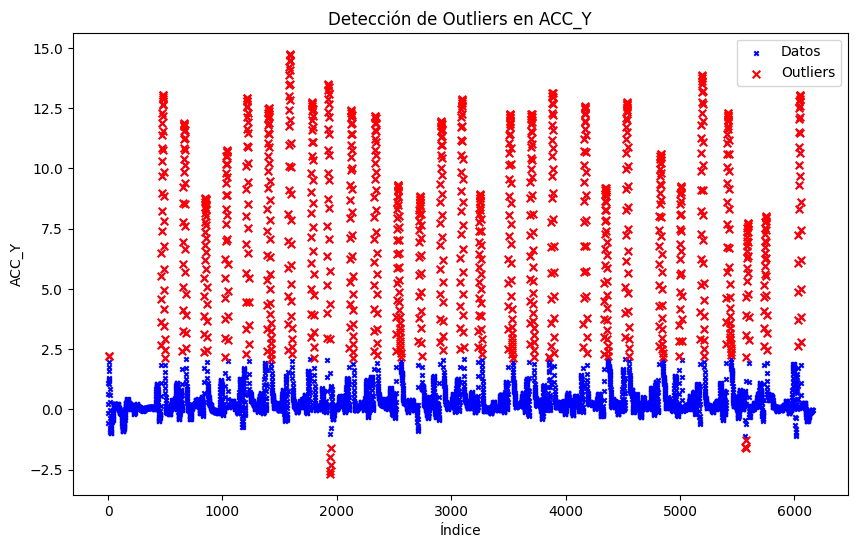

In [18]:

# Graficar los puntos y resaltar los outliers con cruces pequeñas
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['ACC_Y'], label='Datos', color='blue', s=10, marker='x')
plt.scatter(outliers_acc_y.index, outliers_acc_y, label='Outliers', color='red', s=30, marker='x')
plt.xlabel('Índice')
plt.ylabel('ACC_Y')
plt.title('Detección de Outliers en ACC_Y')
plt.legend()
plt.show()

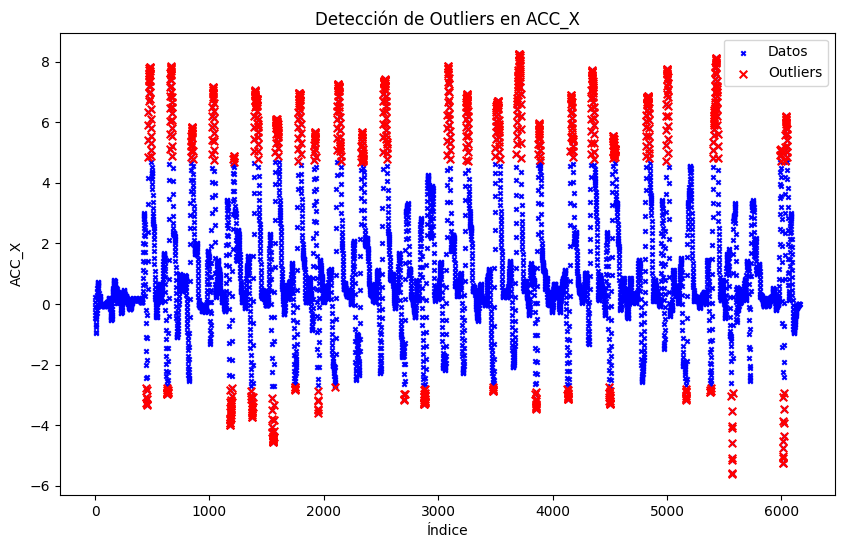

In [19]:

# Graficar los puntos y resaltar los outliers con cruces pequeñas
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['ACC_X'], label='Datos', color='blue', s=10, marker='x')
plt.scatter(outliers_acc_x.index, outliers_acc_x, label='Outliers', color='red', s=30, marker='x')
plt.xlabel('Índice')
plt.ylabel('ACC_X')
plt.title('Detección de Outliers en ACC_X')
plt.legend()
plt.show()

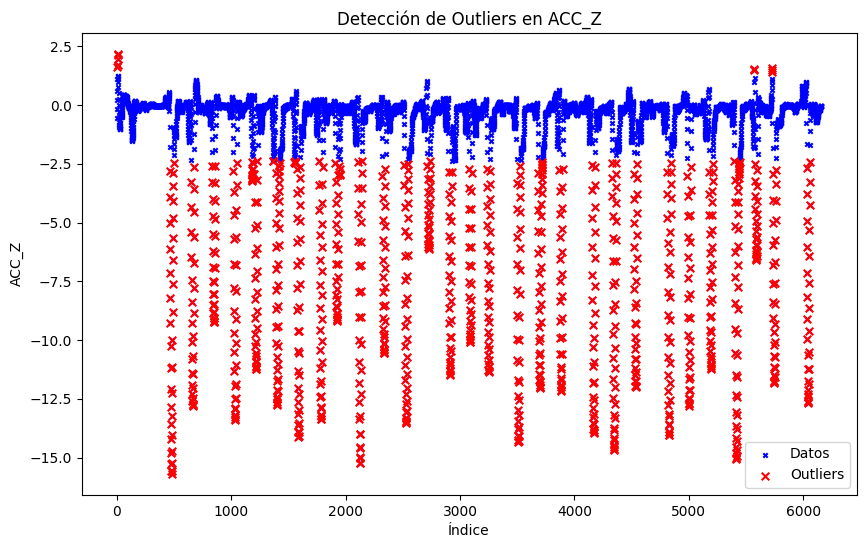

In [20]:

# Graficar los puntos y resaltar los outliers con cruces pequeñas
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['ACC_Z'], label='Datos', color='blue', s=10, marker='x')
plt.scatter(outliers_acc_z.index, outliers_acc_z, label='Outliers', color='red', s=30, marker='x')
plt.xlabel('Índice')
plt.ylabel('ACC_Z')
plt.title('Detección de Outliers en ACC_Z')
plt.legend()
plt.show()

In [21]:

# Definir el tipo de dato para cada columna
dtype = [('ACC_X', float), ('ACC_Y', float), ('ACC_Z', float), ('UNIX_TIMESTAMP', int)]

# Convertir el DataFrame a un array NumPy con tipos de datos específicos
array_dreta = np.array(df_dreta.to_records(index=False), dtype=dtype)

array_reves = np.array(df_reves.to_records(index=False), dtype=dtype)

array_serve = np.array(df_serve.to_records(index=False), dtype=dtype)

array_smash = np.array(df_smash.to_records(index=False), dtype=dtype)

array_vd = np.array(df_vd.to_records(index=False), dtype=dtype)

array_vr = np.array(df_vr.to_records(index=False), dtype=dtype)



In [22]:
array_vr['UNIX_TIMESTAMP']

array([1391697608, 1391697628, 1391697648, ..., 1391772138, 1391772158,
       1391772178])

In [23]:
#GRAFICAMOS TODOS LOS EJES PARA TENER UNA PRIMERA VISUALIZACION

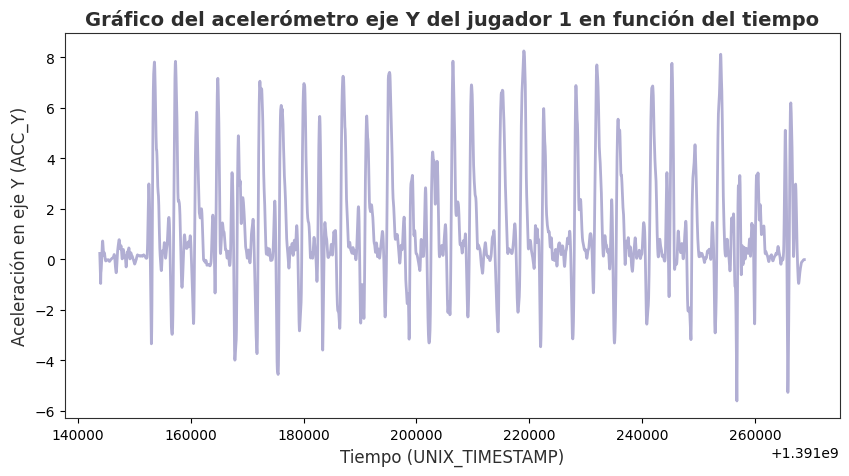

In [24]:

# Extraer los datos
acc_x = array_dreta['ACC_X']
unix_timestamp = array_dreta['UNIX_TIMESTAMP']

# Crear el gráfico
plt.figure(figsize=(10, 5))

# Personalizar el gráfico con una línea de tendencia
plt.plot(unix_timestamp, acc_x, linestyle='-', linewidth=2, color='#9e9ac8', alpha=0.8)

# Agregar título y etiquetas
plt.title('Gráfico del acelerómetro eje Y del jugador 1 en función del tiempo', fontsize=14, fontweight='bold', color='#2e2e2e')
plt.xlabel('Tiempo (UNIX_TIMESTAMP)', fontsize=12, color='#2e2e2e')
plt.ylabel('Aceleración en eje Y (ACC_Y)', fontsize=12, color='#2e2e2e')

# Cambiar el color de los ejes
plt.gca().spines['bottom'].set_color('#2e2e2e')
plt.gca().spines['top'].set_color('#2e2e2e')
plt.gca().spines['left'].set_color('#2e2e2e')
plt.gca().spines['right'].set_color('#2e2e2e')

# Ocultar la cuadrícula de fondo
plt.grid(False)

# Mostrar el gráfico
plt.show()

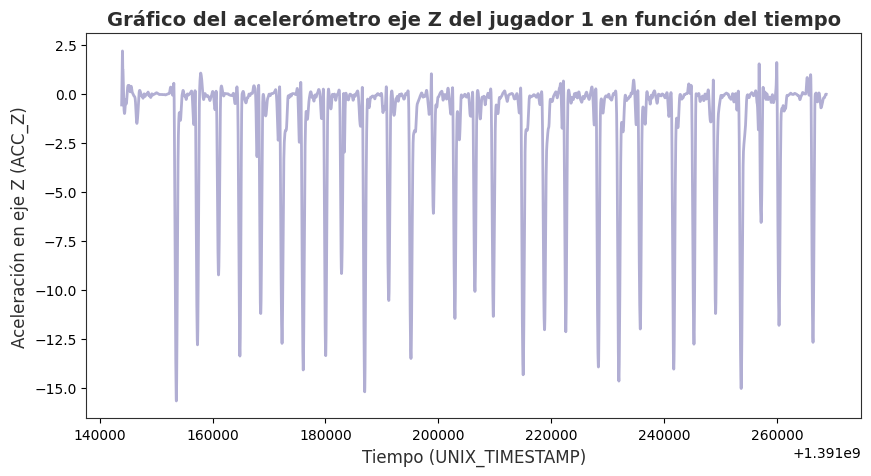

In [25]:
# Extraer los datos
acc_z = array_dreta['ACC_Z']
unix_timestamp = array_dreta['UNIX_TIMESTAMP']

# Crear el gráfico
plt.figure(figsize=(10, 5))

# Personalizar el gráfico con una línea de tendencia
plt.plot(unix_timestamp, acc_z, linestyle='-', linewidth=2, color='#9e9ac8', alpha=0.8)

# Agregar título y etiquetas
plt.title('Gráfico del acelerómetro eje Z del jugador 1 en función del tiempo', fontsize=14, fontweight='bold', color='#2e2e2e')
plt.xlabel('Tiempo (UNIX_TIMESTAMP)', fontsize=12, color='#2e2e2e')
plt.ylabel('Aceleración en eje Z (ACC_Z)', fontsize=12, color='#2e2e2e')

# Cambiar el color de los ejes
plt.gca().spines['bottom'].set_color('#2e2e2e')
plt.gca().spines['top'].set_color('#2e2e2e')
plt.gca().spines['left'].set_color('#2e2e2e')
plt.gca().spines['right'].set_color('#2e2e2e')

# Ocultar la cuadrícula de fondo
plt.grid(False)

# Mostrar el gráfico
plt.show()

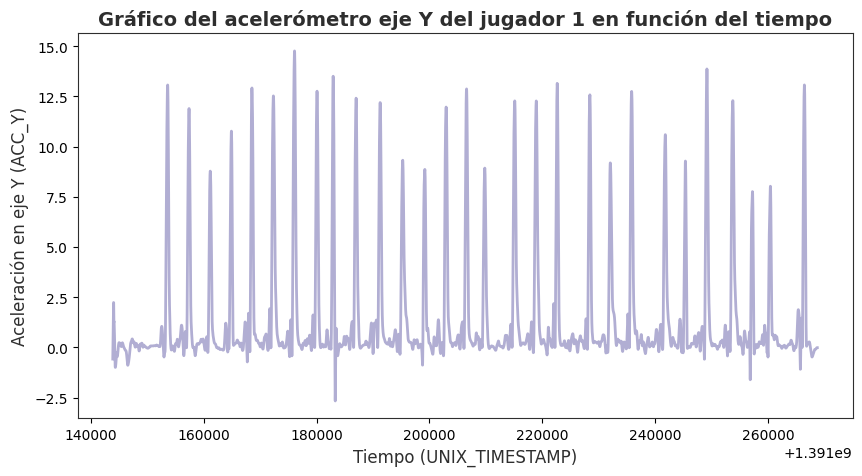

In [26]:
# Extraer los datos
acc_y = array_dreta['ACC_Y']
unix_timestamp = array_dreta['UNIX_TIMESTAMP']

# Crear el gráfico
plt.figure(figsize=(10, 5))

# Personalizar el gráfico con una línea de tendencia
plt.plot(unix_timestamp, acc_y, linestyle='-', linewidth=2, color='#9e9ac8', alpha=0.8)

# Agregar título y etiquetas
plt.title('Gráfico del acelerómetro eje Y del jugador 1 en función del tiempo', fontsize=14, fontweight='bold', color='#2e2e2e')
plt.xlabel('Tiempo (UNIX_TIMESTAMP)', fontsize=12, color='#2e2e2e')
plt.ylabel('Aceleración en eje Y (ACC_Y)', fontsize=12, color='#2e2e2e')

# Cambiar el color de los ejes
plt.gca().spines['bottom'].set_color('#2e2e2e')
plt.gca().spines['top'].set_color('#2e2e2e')
plt.gca().spines['left'].set_color('#2e2e2e')
plt.gca().spines['right'].set_color('#2e2e2e')

# Ocultar la cuadrícula de fondo
plt.grid(False)

# Mostrar el gráfico
plt.show()

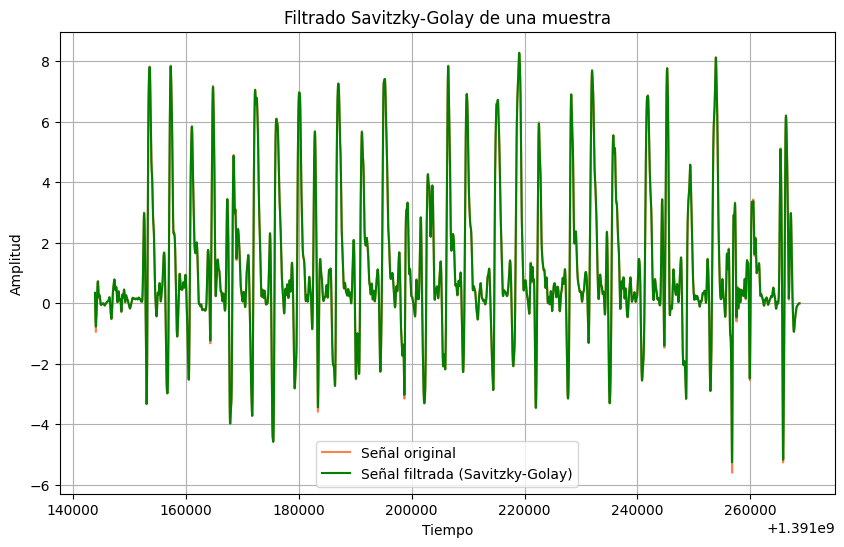

In [27]:


# Aplicar el filtrado Savitzky-Golay a la segunda columna de la muestra
filtered_signal_savgol = savgol_filter(acc_x, window_length=13, polyorder=2)

# Graficar la señal original y la señal filtrada con Savitzky-Golay
plt.figure(figsize=(10, 6))
plt.plot(unix_timestamp, acc_x, label='Señal original',  color='coral')
plt.plot(unix_timestamp, filtered_signal_savgol, label='Señal filtrada (Savitzky-Golay)',  color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtrado Savitzky-Golay de una muestra')
plt.legend()
plt.grid(True)
plt.show()


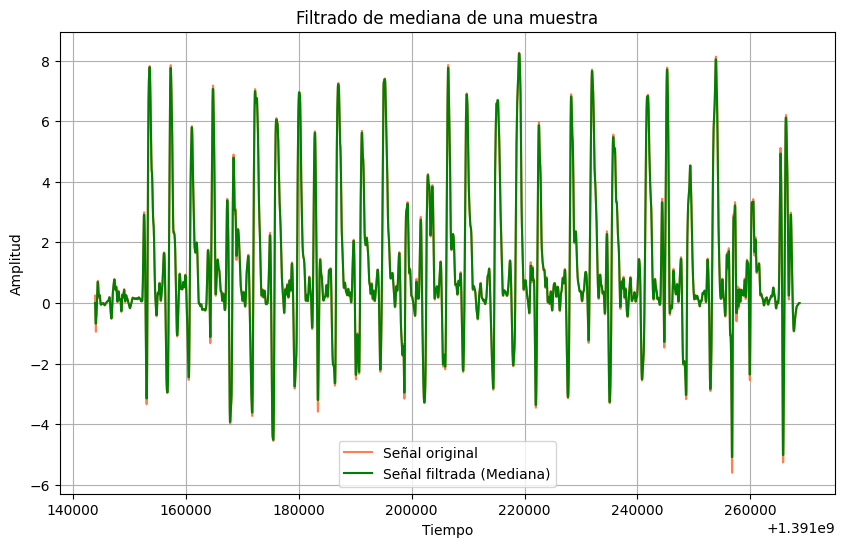

In [28]:

# Aplicar el filtrado de mediana a la segunda columna de la muestra
filtered_signal_medfilt = medfilt(acc_x, kernel_size=7)  # El tamaño del kernel debe ser impar

# Graficar la señal original y la señal filtrada con mediana
plt.figure(figsize=(10, 6))
plt.plot(unix_timestamp, acc_x, label='Señal original',  color='coral')
plt.plot(unix_timestamp, filtered_signal_medfilt, label='Señal filtrada (Mediana)',  color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtrado de mediana de una muestra')
plt.legend()
plt.grid(True)
plt.show()


In [29]:

# # Definir el nivel de descomposición y la wavelet a utilizar
# level = 5
# wavelet = 'db4'

# # Aplicar wavelet denoising a la segunda columna de la muestra
# coeffs = pywt.wavedec(acc_x, wavelet, level=level)
# coeffs[1:] = (pywt.threshold(detail, value=0.1, mode='soft') for detail in coeffs[1:])
# filtered_signal_wavelet = pywt.waverec(coeffs, wavelet)

# # Graficar la señal original y la señal filtrada con wavelet denoising
# plt.figure(figsize=(10, 6))
# plt.plot(unix_timestamp, acc_x, label='Señal original',  color='coral')
# plt.plot(unix_timestamp, filtered_signal_wavelet, label='Señal filtrada (Wavelet)',  color='green' )
# plt.xlabel('Tiempo')
# plt.ylabel('Amplitud')
# plt.title('Filtrado de Wavelet de una muestra')
# plt.legend()
# plt.grid(True)
# plt.show()


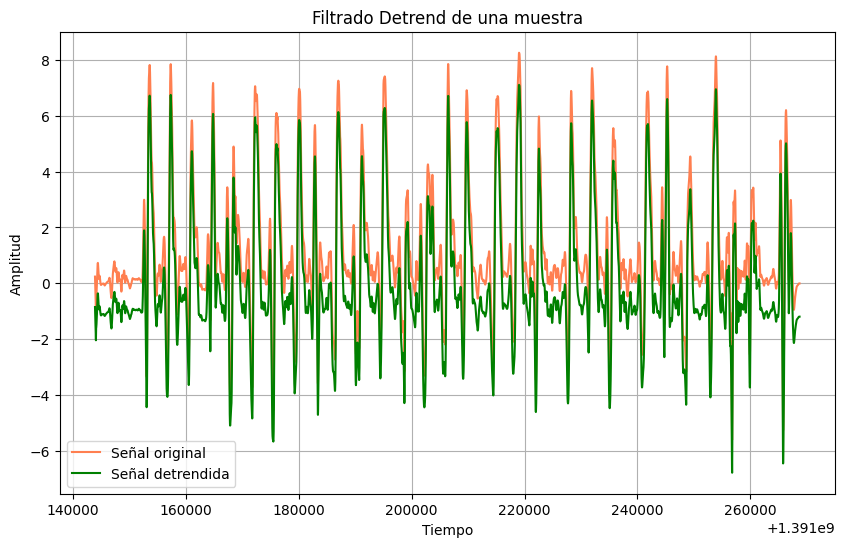

In [30]:
# Aplicar el filtrado detrend a la señal
detrended_signal = detrend(acc_x)

# Graficar la señal original y la señal detrendida
plt.figure(figsize=(10, 6))
plt.plot(unix_timestamp, acc_x, label='Señal original',  color='coral')
plt.plot(unix_timestamp, detrended_signal, label='Señal detrendida',  color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtrado Detrend de una muestra')
plt.legend()
plt.grid(True)
plt.show()

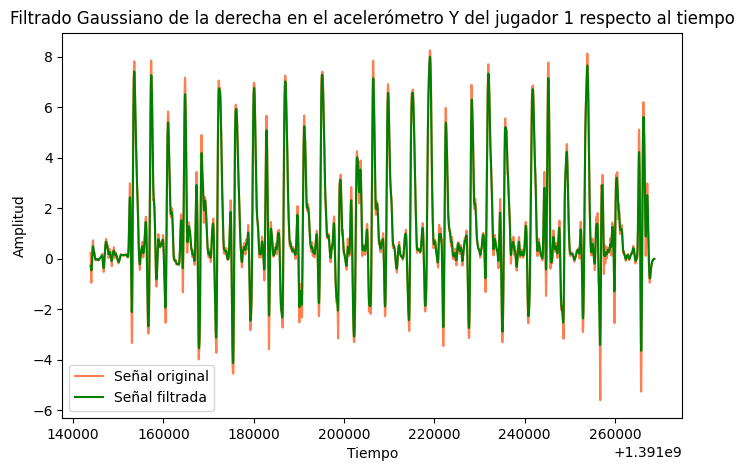

In [31]:

# Aplicar un filtro gaussiano a la señal ACC_X
filtered_signal = gaussian_filter(array_dreta['ACC_X'], sigma=5)  # sigma es el parámetro que controla el ancho del filtro gaussiano

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(8, 5))
plt.plot(array_dreta['UNIX_TIMESTAMP'], array_dreta['ACC_X'], label='Señal original', color='coral')
plt.plot(array_dreta['UNIX_TIMESTAMP'], filtered_signal, label='Señal filtrada', color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtrado Gaussiano de la derecha en el acelerómetro Y del jugador 1 respecto al tiempo')
plt.legend()
plt.grid(False)  # Quitar la cuadrícula del fondo
plt.show()

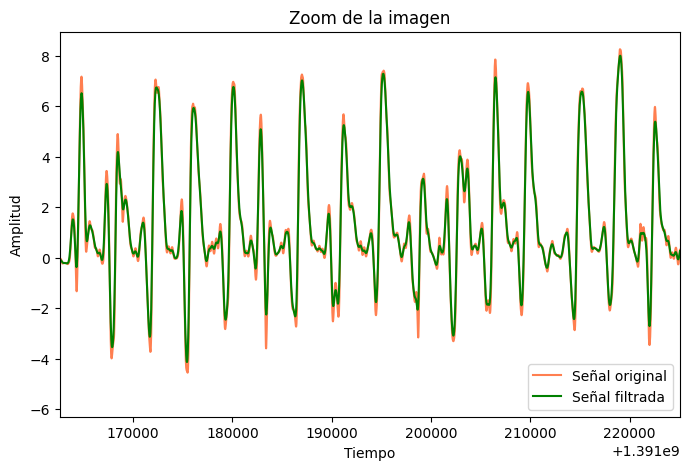

In [32]:

# Calcular el rango del 10% central de la muestra
total_points = len(array_dreta['UNIX_TIMESTAMP'])
start_index = int(total_points * 0.15)  # Inicio del 10% central
end_index = int(total_points * 0.65)    # Fin del 10% central

# Aplicar un filtro gaussiano a la señal ACC_X
filtered_signal = gaussian_filter(array_dreta['ACC_X'], sigma=5)  # sigma es el parámetro que controla el ancho del filtro gaussiano

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(8, 5))
plt.plot(array_dreta['UNIX_TIMESTAMP'], array_dreta['ACC_X'], label='Señal original', color='coral')
plt.plot(array_dreta['UNIX_TIMESTAMP'], filtered_signal, label='Señal filtrada', color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Zoom de la imagen')
plt.legend()
plt.grid(False)  # Quitar la cuadrícula del fondo

# Limitar el eje x al 10% central de la muestra
plt.xlim(array_dreta['UNIX_TIMESTAMP'][start_index], array_dreta['UNIX_TIMESTAMP'][end_index])

plt.show()

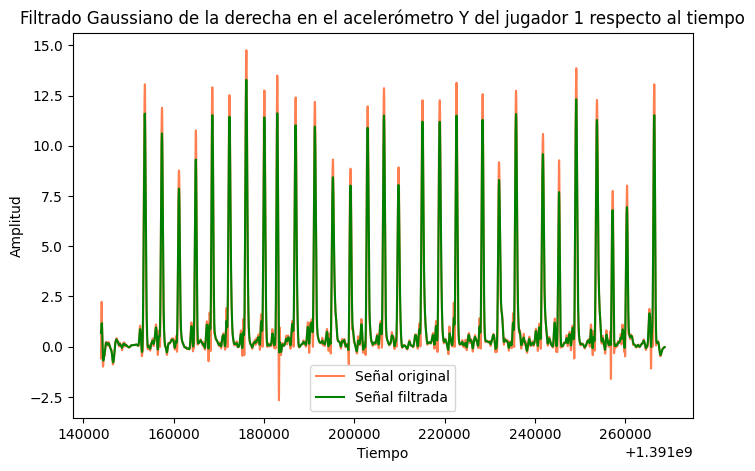

In [33]:

# Aplicar un filtro gaussiano a la señal ACC_Y
filtered_signal = gaussian_filter(array_dreta['ACC_Y'], sigma=5)  # sigma es el parámetro que controla el ancho del filtro gaussiano

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(8, 5))
plt.plot(array_dreta['UNIX_TIMESTAMP'], array_dreta['ACC_Y'], label='Señal original', color='coral')
plt.plot(array_dreta['UNIX_TIMESTAMP'], filtered_signal, label='Señal filtrada', color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtrado Gaussiano de la derecha en el acelerómetro Y del jugador 1 respecto al tiempo')
plt.legend()
plt.grid(False)  # Quitar la cuadrícula del fondo
plt.show()


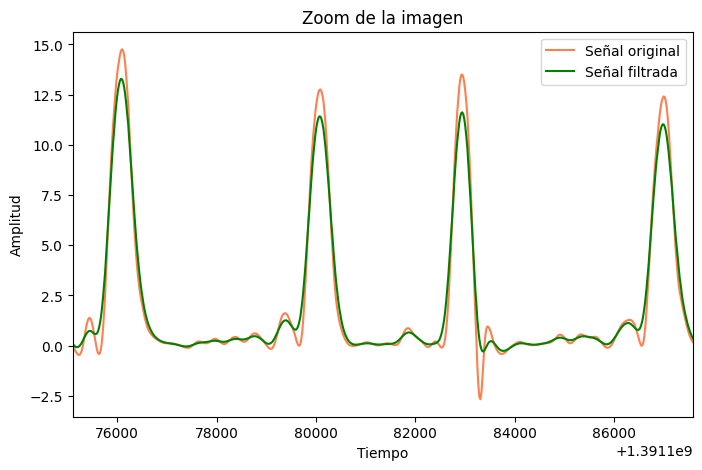

In [34]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Calcular el rango del 10% central de la muestra
total_points = len(array_dreta['UNIX_TIMESTAMP'])
start_index = int(total_points * 0.25)  # Inicio del 10% central
end_index = int(total_points * 0.35)    # Fin del 10% central

# Aplicar un filtro gaussiano a la señal ACC_X
filtered_signal = gaussian_filter(array_dreta['ACC_Y'], sigma=5)  # sigma es el parámetro que controla el ancho del filtro gaussiano

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(8, 5))
plt.plot(array_dreta['UNIX_TIMESTAMP'], array_dreta['ACC_Y'], label='Señal original', color='coral')
plt.plot(array_dreta['UNIX_TIMESTAMP'], filtered_signal, label='Señal filtrada', color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Zoom de la imagen')
plt.legend()
plt.grid(False)  # Quitar la cuadrícula del fondo

# Limitar el eje x al 10% central de la muestra
plt.xlim(array_dreta['UNIX_TIMESTAMP'][start_index], array_dreta['UNIX_TIMESTAMP'][end_index])

plt.show()


In [35]:
#realizamos el filtrado gausiano y la normalización

In [36]:
#derecha
#para eje x
# Eliminar la tendencia de la señal

array_dreta['ACC_X'] = gaussian_filter(array_dreta['ACC_X'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_dreta['ACC_X'] = (array_dreta['ACC_X'] - np.min(array_dreta['ACC_X'])) / (np.max(array_dreta['ACC_X']) - np.min(array_dreta['ACC_X']))

#para eje y

array_dreta['ACC_Y'] = gaussian_filter(array_dreta['ACC_Y'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_dreta['ACC_Y'] = (array_dreta['ACC_Y'] - np.min(array_dreta['ACC_Y'])) / (np.max(array_dreta['ACC_Y']) - np.min(array_dreta['ACC_Y']))

#para eje z

array_dreta['ACC_Z'] = gaussian_filter(array_dreta['ACC_Z'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_dreta['ACC_Z'] = (array_dreta['ACC_Z'] - np.min(array_dreta['ACC_Z'])) / (np.max(array_dreta['ACC_Z']) - np.min(array_dreta['ACC_Z']))


In [37]:

#smash
#para eje x
# Eliminar la tendencia de la señal

array_smash['ACC_X'] = gaussian_filter(array_smash['ACC_X'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_smash['ACC_X'] = (array_smash['ACC_X'] - np.min(array_smash['ACC_X'])) / (np.max(array_smash['ACC_X']) - np.min(array_smash['ACC_X']))

#para eje y

array_smash['ACC_Y'] = gaussian_filter(array_smash['ACC_Y'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_smash['ACC_Y'] = (array_smash['ACC_Y'] - np.min(array_smash['ACC_Y'])) / (np.max(array_smash['ACC_Y']) - np.min(array_smash['ACC_Y']))

#para eje z

array_smash['ACC_Z'] = gaussian_filter(array_smash['ACC_Z'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_smash['ACC_Z'] = (array_smash['ACC_Z'] - np.min(array_smash['ACC_Z'])) / (np.max(array_smash['ACC_Z']) - np.min(array_smash['ACC_Z']))


In [38]:
#servicio
#para eje x
# Eliminar la tendencia de la señal

array_serve['ACC_X'] = gaussian_filter(array_serve['ACC_X'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_serve['ACC_X'] = (array_serve['ACC_X'] - np.min(array_serve['ACC_X'])) / (np.max(array_serve['ACC_X']) - np.min(array_serve['ACC_X']))

#para eje y

array_serve['ACC_Y'] = gaussian_filter(array_serve['ACC_Y'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_serve['ACC_Y'] = (array_serve['ACC_Y'] - np.min(array_serve['ACC_Y'])) / (np.max(array_serve['ACC_Y']) - np.min(array_serve['ACC_Y']))

#para eje z

array_serve['ACC_Z'] = gaussian_filter(array_serve['ACC_Z'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_serve['ACC_Z'] = (array_serve['ACC_Z'] - np.min(array_serve['ACC_Z'])) / (np.max(array_serve['ACC_Z']) - np.min(array_serve['ACC_Z']))


In [39]:
#reves
#para eje x
# Eliminar la tendencia de la señal

array_reves['ACC_X'] = gaussian_filter(array_reves['ACC_X'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_reves['ACC_X'] = (array_reves['ACC_X'] - np.min(array_reves['ACC_X'])) / (np.max(array_reves['ACC_X']) - np.min(array_reves['ACC_X']))

#para eje y

array_reves['ACC_Y'] = gaussian_filter(array_reves['ACC_Y'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_reves['ACC_Y'] = (array_reves['ACC_Y'] - np.min(array_reves['ACC_Y'])) / (np.max(array_reves['ACC_Y']) - np.min(array_reves['ACC_Y']))

#para eje z

array_reves['ACC_Z'] = gaussian_filter(array_reves['ACC_Z'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_reves['ACC_Z'] = (array_reves['ACC_Z'] - np.min(array_reves['ACC_Z'])) / (np.max(array_reves['ACC_Z']) - np.min(array_reves['ACC_Z']))


In [40]:
#volea derecha
#para eje x
# Eliminar la tendencia de la señal

array_vd['ACC_X'] = gaussian_filter(array_vd['ACC_X'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_vd['ACC_X'] = (array_vd['ACC_X'] - np.min(array_vd['ACC_X'])) / (np.max(array_vd['ACC_X']) - np.min(array_vd['ACC_X']))

#para eje y

array_vd['ACC_Y'] = gaussian_filter(array_vd['ACC_Y'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_vd['ACC_Y'] = (array_vd['ACC_Y'] - np.min(array_vd['ACC_Y'])) / (np.max(array_vd['ACC_Y']) - np.min(array_vd['ACC_Y']))

#para eje z

array_vd['ACC_Z'] = gaussian_filter(array_vd['ACC_Z'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_vd['ACC_Z'] = (array_vd['ACC_Z'] - np.min(array_vd['ACC_Z'])) / (np.max(array_vd['ACC_Z']) - np.min(array_vd['ACC_Z']))


In [41]:
#volea reves
#para eje x
# Eliminar la tendencia de la señal

array_vr['ACC_X'] = gaussian_filter(array_vr['ACC_X'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_vr['ACC_X'] = (array_vr['ACC_X'] - np.min(array_vr['ACC_X'])) / (np.max(array_vr['ACC_X']) - np.min(array_vr['ACC_X']))

#para eje y

array_vr['ACC_Y'] = gaussian_filter(array_vr['ACC_Y'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_vr['ACC_Y'] = (array_vr['ACC_Y'] - np.min(array_vr['ACC_Y'])) / (np.max(array_vr['ACC_Y']) - np.min(array_vr['ACC_Y']))

#para eje z

array_vr['ACC_Z'] = gaussian_filter(array_vr['ACC_Z'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_vr['ACC_Z'] = (array_vr['ACC_Z'] - np.min(array_vr['ACC_Z'])) / (np.max(array_vr['ACC_Z']) - np.min(array_vr['ACC_Z']))


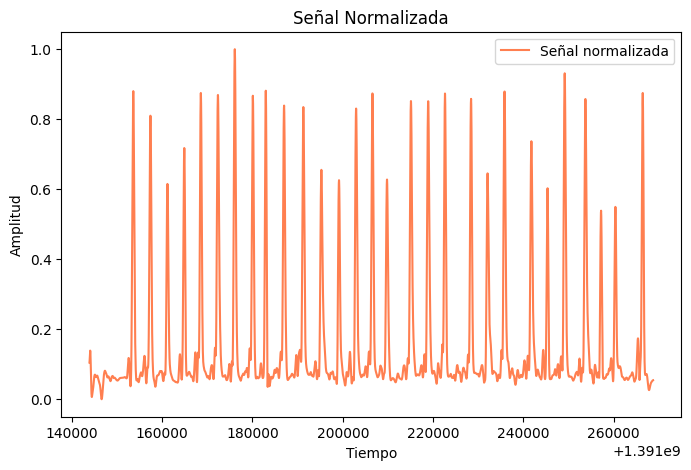

In [42]:

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(8, 5))
plt.plot(array_dreta['UNIX_TIMESTAMP'], array_dreta['ACC_Y'], label='Señal normalizada', color='coral')

plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal Normalizada')
plt.legend()
plt.grid(False)  # Quitar la cuadrícula del fondo
plt.show()


# DETECCION DE GOLPES

# DERECHA DE ACC

## Miramos para el eje x el y y el z, cuantos picos detecta

0.17500707061052193
0.43449809970787157
[ 477  663  847 1032 1213 1404 1589 1787 1922 2128 2335 2531 2913 3089
 3251 3518 3708 3882 4165 4347 4533 4831 5002 5203 5428 6042]


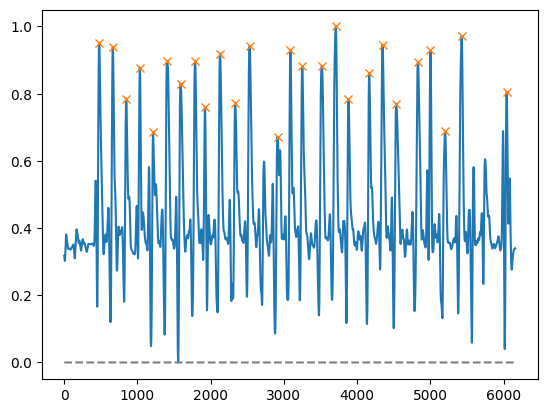

distancia media 222.6
numero total de golpes 26


In [43]:
#para x
peak_height = np.std(array_dreta['ACC_X'])
mean_signal = np.mean(array_dreta['ACC_X'])
print(peak_height)
print(mean_signal)

peaks, _ = find_peaks(array_dreta['ACC_X'], height=mean_signal + peak_height, distance = 100)
print(peaks)
plt.plot(array_dreta['ACC_X'])
plt.plot(peaks, array_dreta['ACC_X'][peaks], "x")
plt.plot(np.zeros_like(array_dreta['ACC_X']), "--", color="gray")
plt.show()
# Calcular la distancia entre los picos
distances_between_peaks = np.diff(peaks)

# Calcular la media de la distancia entre picos
mean_distance_between_peaks = np.mean(distances_between_peaks)
print('distancia media' ,mean_distance_between_peaks)
num_peaks = len(peaks)
print('numero total de golpes', num_peaks)

Altura del pico: 0.19520211475842933
Media de la señal: 0.1580899664987579


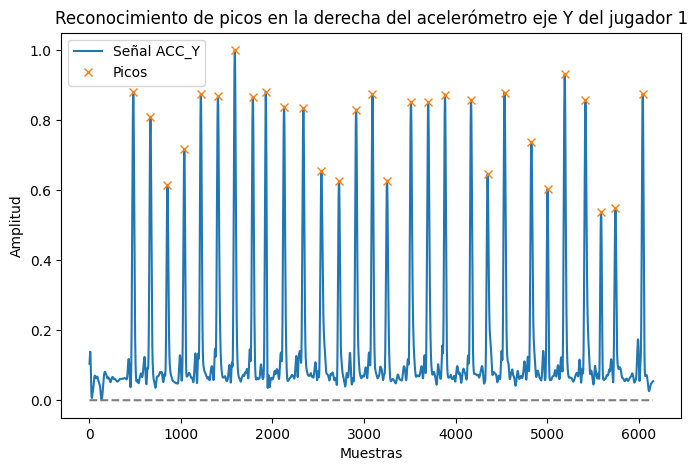

Distancia media entre picos: 198.82142857142858
Número total de picos: 29


In [44]:

# Calcular la altura del pico y la media de la señal
peak_height = np.std(array_dreta['ACC_Y'])
mean_signal = np.mean(array_dreta['ACC_Y'])
print("Altura del pico:", peak_height)
print("Media de la señal:", mean_signal)

# Encontrar picos en la señal ACC_Y
peaks, _ = find_peaks(array_dreta['ACC_Y'], height=mean_signal + peak_height, distance=2)

# Graficar la señal y los picos
plt.figure(figsize=(8, 5))
plt.plot(array_dreta['ACC_Y'], label='Señal ACC_Y')
plt.plot(peaks, np.array(array_dreta['ACC_Y'])[peaks], "x", label='Picos')
plt.plot(np.zeros_like(array_dreta['ACC_Y']), "--", color="gray")
plt.title('Reconocimiento de picos en la derecha del acelerómetro eje Y del jugador 1')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

# Calcular la distancia entre los picos
distances_between_peaks = np.diff(peaks)

# Calcular la media de la distancia entre picos
mean_distance_between_peaks = np.mean(distances_between_peaks)
print('Distancia media entre picos:', mean_distance_between_peaks)

# Número total de picos
num_peaks = len(peaks)
print('Número total de picos:', num_peaks)

0.19265045840276213
0.8259093614266508


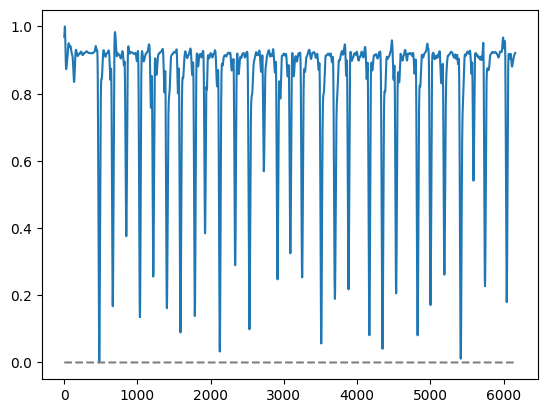

distancia media nan
numero total de golpes 0
entro aqui


C:\Users\Holacons\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Holacons\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


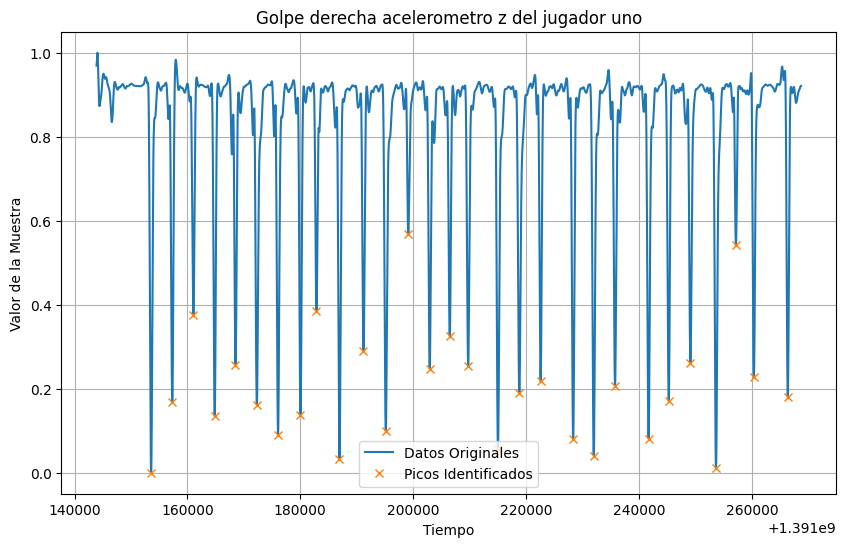

0.19265045840276213
-0.8259093614266508
distancia media 198.75
numero total de golpes 29


In [45]:
#para el eje z

peak_height = np.std(array_dreta['ACC_Z'])
mean_signal = np.mean(array_dreta['ACC_Z'])
print(peak_height)
print(mean_signal)

peaks, _ = find_peaks(array_dreta['ACC_Z'], height=mean_signal + peak_height, distance = 100)

peaks_tiempo = array_dreta['UNIX_TIMESTAMP'][peaks]
plt.plot(array_dreta['ACC_Z'])
plt.plot(peaks, array_dreta['ACC_Z'][peaks], "x")
plt.plot(np.zeros_like(array_dreta['ACC_Z']), "--", color="gray")
plt.show()
# Calcular la distancia entre los picos
distances_between_peaks = np.diff(peaks)

# Calcular la media de la distancia entre picos
mean_distance_between_peaks = np.mean(distances_between_peaks)
print('distancia media' ,mean_distance_between_peaks)
num_peaks = len(peaks)
print('numero total de golpes', num_peaks)

if (mean_distance_between_peaks <=  100) and (mean_distance_between_peaks >=  150):
    plt.plot(array_dreta['ACC_Z'])
    plt.plot(peaks, array_dreta['ACC_Z'][peaks], "x")
    plt.plot(np.zeros_like(array_dreta['ACC_Z']), "--", color="gray")
    plt.show()
else:
    print('entro aqui')
    # Invertir el signo de los datos
    array1_z1_invertido = -array_dreta['ACC_Z']

    # Calcular la desviación estándar y la media del array invertido
    peak_height = np.std(array1_z1_invertido)
    mean_signal = np.mean(array1_z1_invertido)

    # Encontrar picos negativos
    peaks, _ = find_peaks(array1_z1_invertido, height=mean_signal + peak_height, distance=100)


    plt.figure(figsize=(10, 6))
    plt.plot(array_dreta['UNIX_TIMESTAMP'], array_dreta['ACC_Z'], label='Datos Originales')
    plt.plot(array_dreta['UNIX_TIMESTAMP'][peaks], array_dreta['ACC_Z'][peaks], 'x', label='Picos Identificados')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor de la Muestra')
    plt.title('Golpe derecha acelerometro z del jugador uno')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(peak_height)
    print(mean_signal)

    distances_between_peaks = np.diff(peaks)
    mean_distance_between_peaks = np.mean(distances_between_peaks)
    print('distancia media' ,mean_distance_between_peaks)
    num_peaks = len(peaks)
    print('numero total de golpes', num_peaks)





In [46]:
#creamos una funcion que calcule la media de la muestra 
#y si es menor que 0.5 busque puntos positivos y si es mayor que 0.5 busque puntos negativos

Media de la señal: 0.43449809970787157
Altura del pico: 0.17500707061052193
Distancia media entre picos: 222.6
Número total de golpes: 26


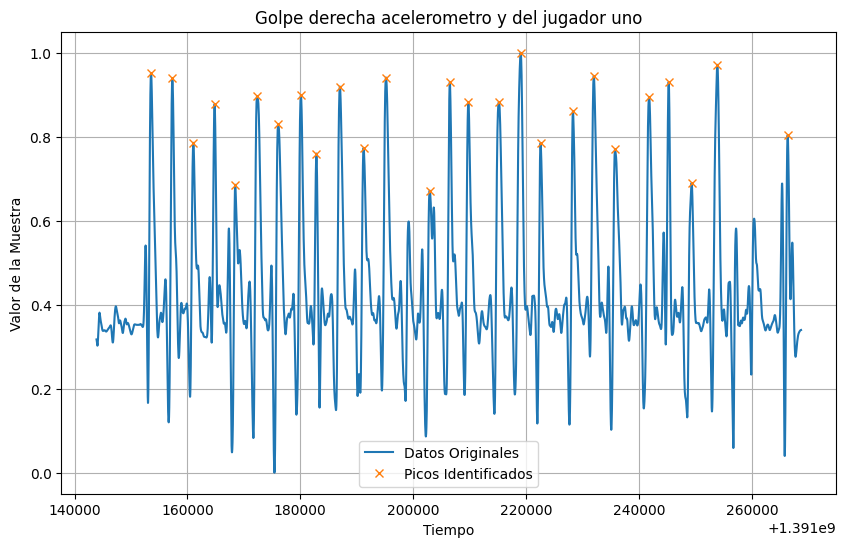

array([ 477,  663,  847, 1032, 1213, 1404, 1589, 1787, 1922, 2128, 2335,
       2531, 2913, 3089, 3251, 3518, 3708, 3882, 4165, 4347, 4533, 4831,
       5002, 5203, 5428, 6042], dtype=int64)

In [47]:


def analyze_signal(array, eje):
    # Calcular la media de la señal ACC_Z
    mean_signal = np.mean(array[eje])
    print(f'Media de la señal: {mean_signal}')
    
    # Determinar si buscar picos positivos o negativos
    if mean_signal < 0.5:
        signal_to_analyze = array[eje]
        direction = "positive"
    else:
        signal_to_analyze = -array[eje]
        direction = "negative"
    
    # Calcular la desviación estándar
    peak_height = np.std(array[eje])
    
    # Ajustar el umbral de altura para los picos negativos
    height_threshold = mean_signal + peak_height if direction == "positive" else -mean_signal + peak_height
    
    # Encontrar picos en la señal
    peaks, _ = find_peaks(signal_to_analyze, height=height_threshold, distance=100)
    
    # Calcular la distancia entre los picos
    distances_between_peaks = np.diff(peaks)
    
    # Calcular la media de la distancia entre picos
    mean_distance_between_peaks = np.mean(distances_between_peaks)
    
    # Número total de picos
    num_peaks = len(peaks)
    
    print(f'Altura del pico: {peak_height}')
    print(f'Distancia media entre picos: {mean_distance_between_peaks}')
    print(f'Número total de golpes: {num_peaks}')
    
    # Graficar la señal y los picos
    plt.figure(figsize=(10, 6))
    plt.plot(array['UNIX_TIMESTAMP'], array[eje], label='Datos Originales')
    plt.plot(array['UNIX_TIMESTAMP'][peaks], array[eje][peaks], 'x', label='Picos Identificados')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor de la Muestra')
    plt.title('Golpe derecha acelerometro y del jugador uno')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return peaks



# Llamar a la función con los datos
analyze_signal(array_dreta, 'ACC_X')


Media de la señal: 0.1580899664987579
Altura del pico: 0.19520211475842933
Distancia media entre picos: 198.82142857142858
Número total de golpes: 29


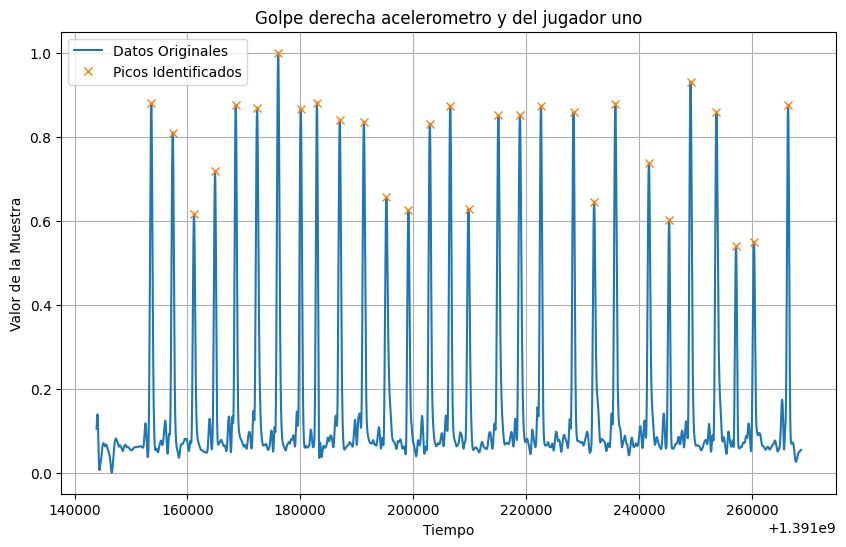

In [48]:
# Llamar a la función con los datos
peaks = analyze_signal(array_dreta, 'ACC_Y')

Media de la señal: 0.8259093614266508
Altura del pico: 0.19265045840276213
Distancia media entre picos: 198.75
Número total de golpes: 29


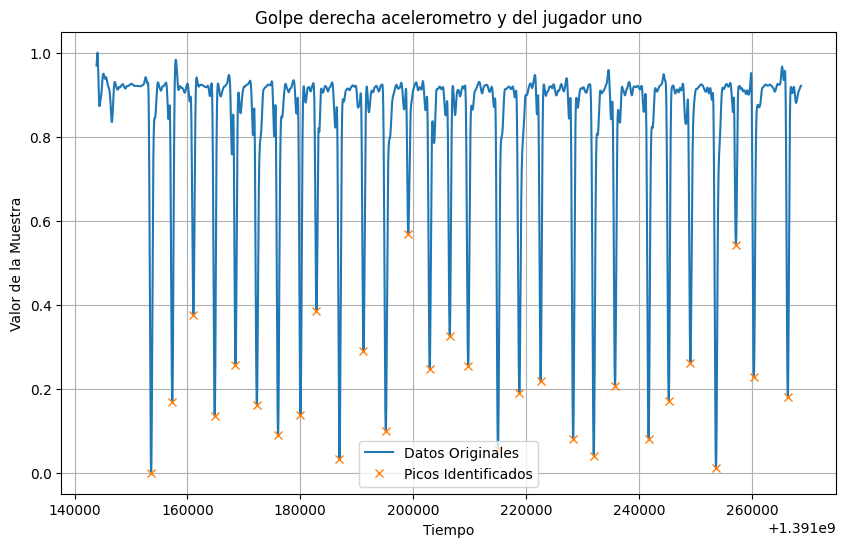

In [49]:
# Llamar a la función con los datos
peaks = analyze_signal(array_dreta, 'ACC_Z')

In [50]:
#Escogemos uno de los ejes para decidir la cantidad de golpe

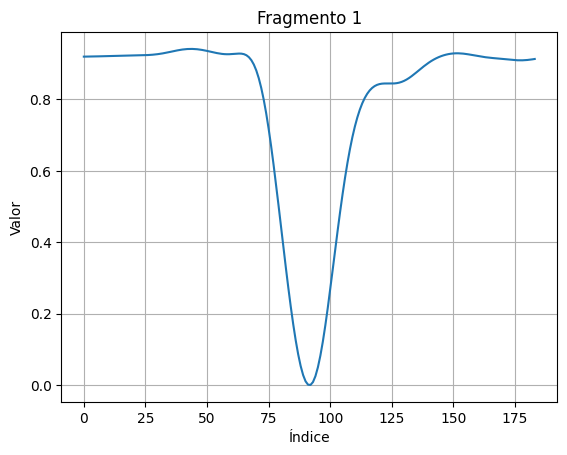

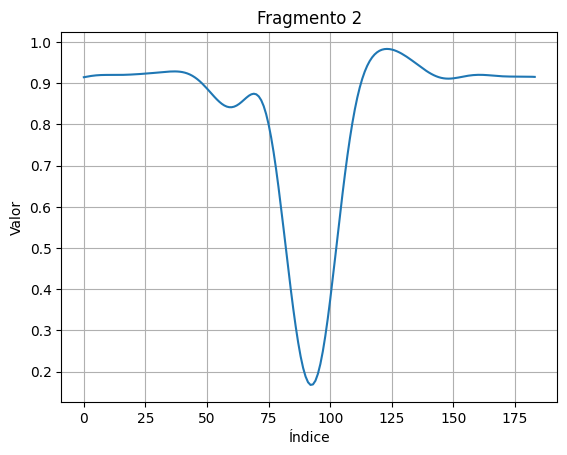

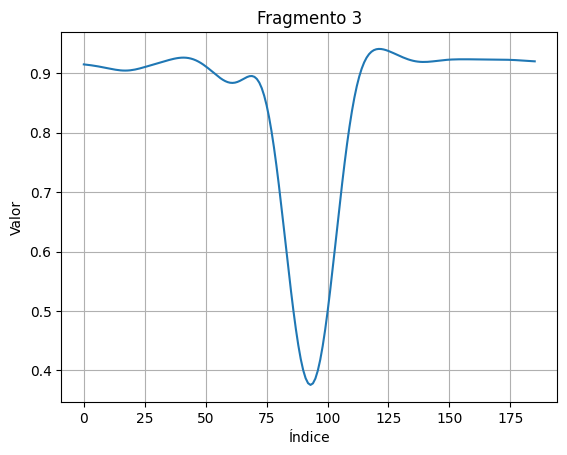

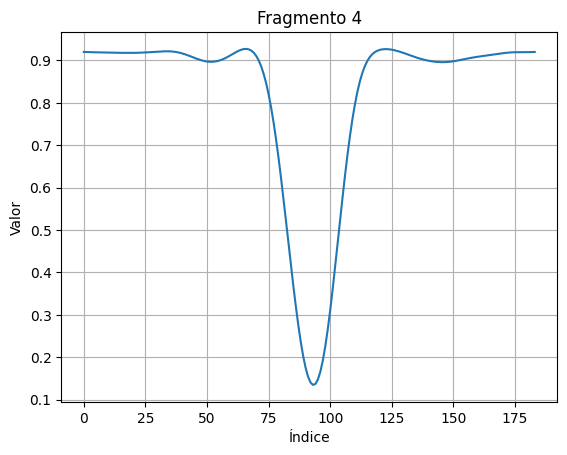

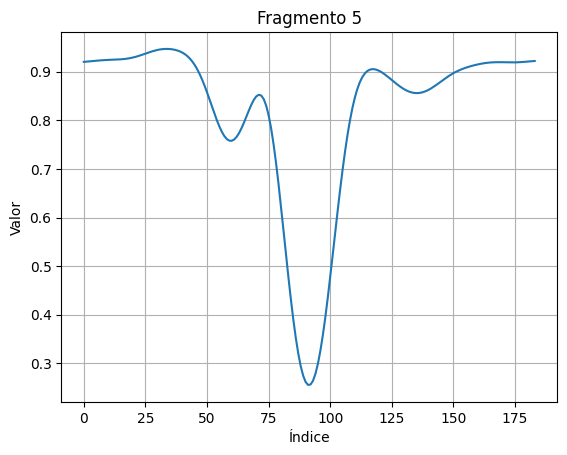

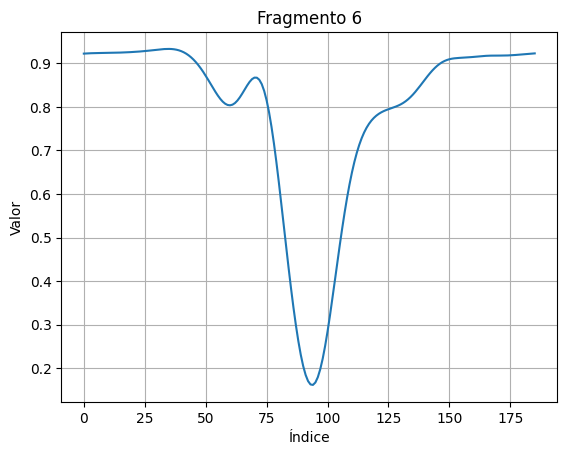

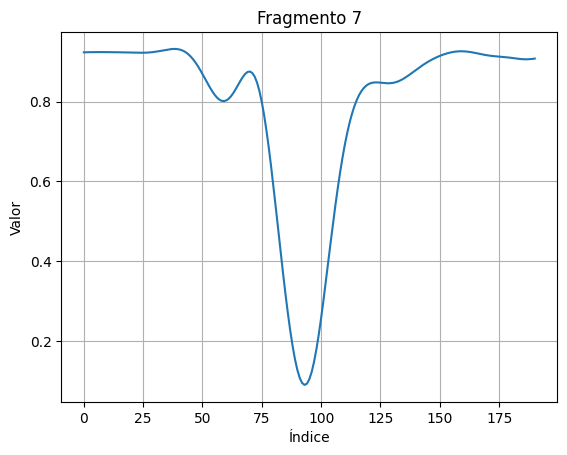

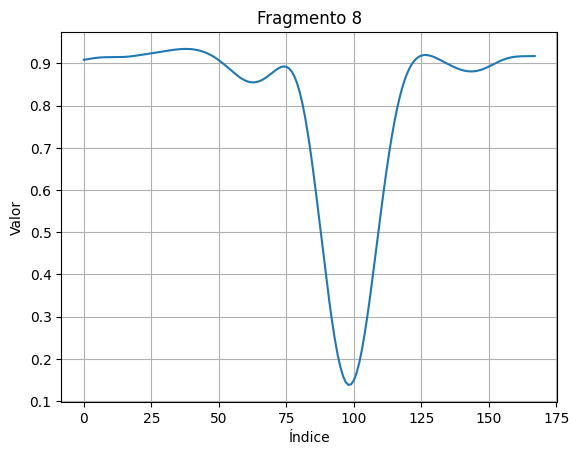

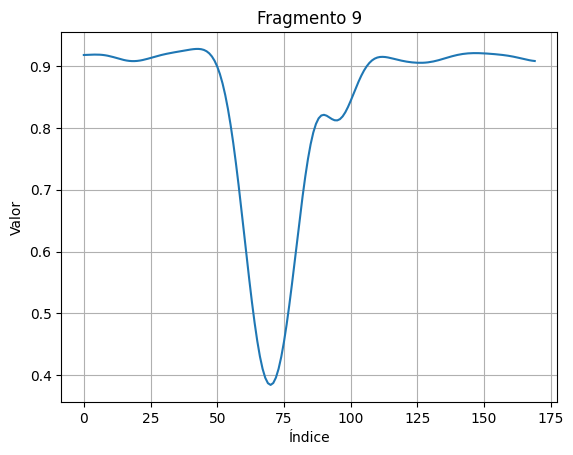

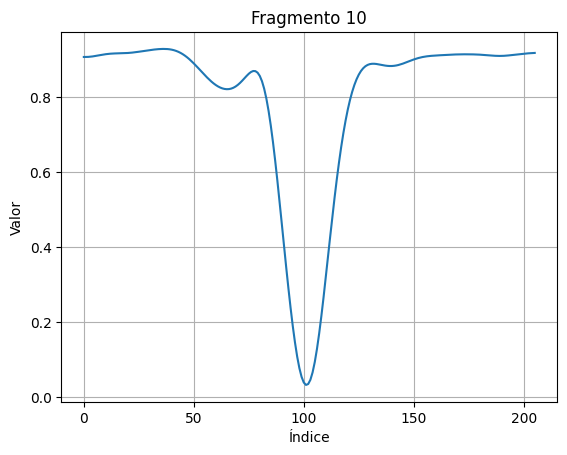

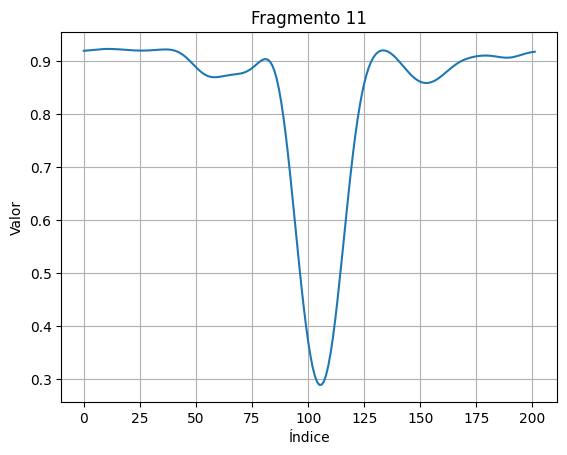

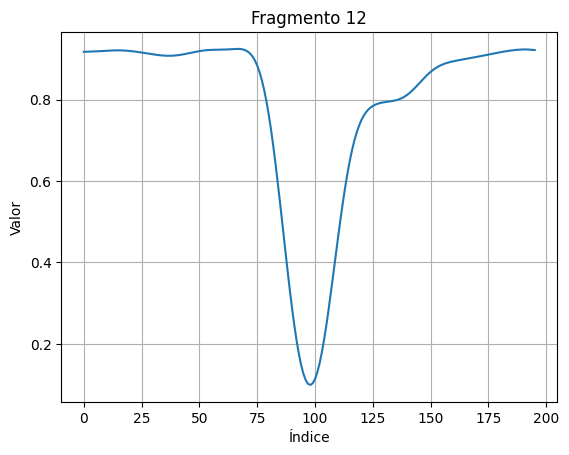

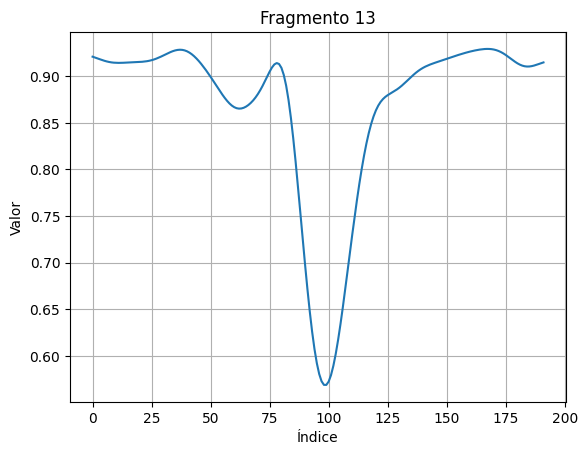

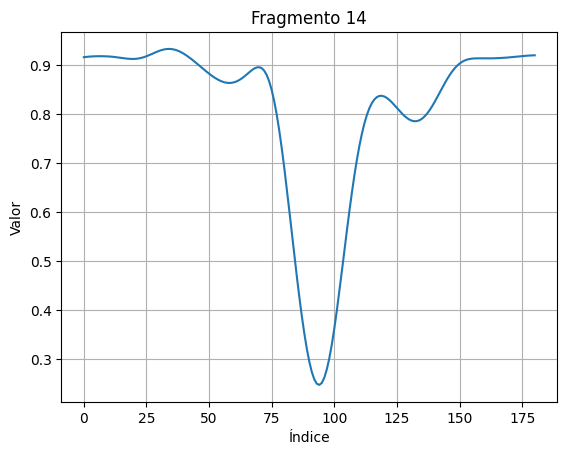

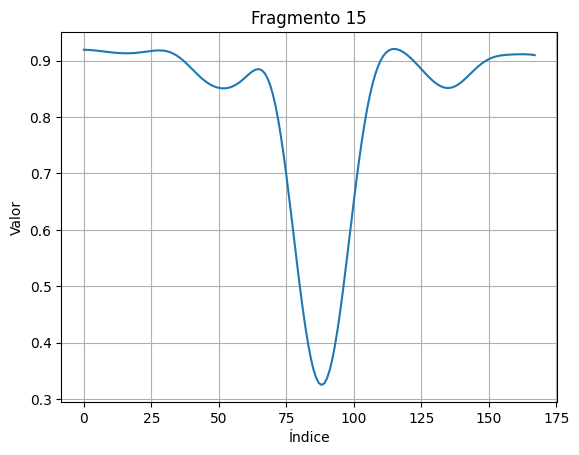

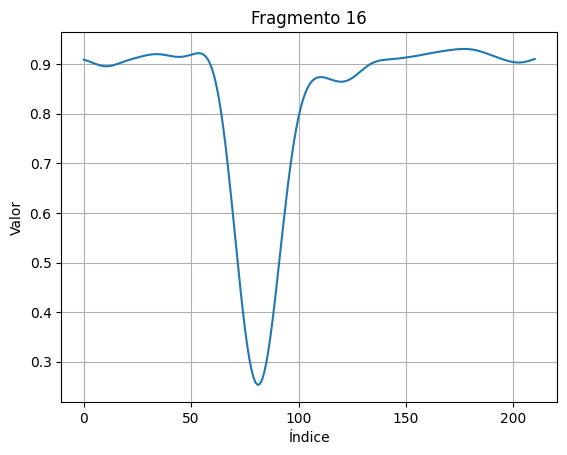

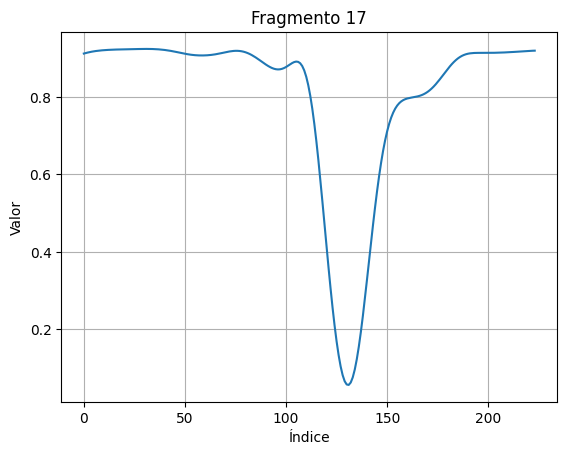

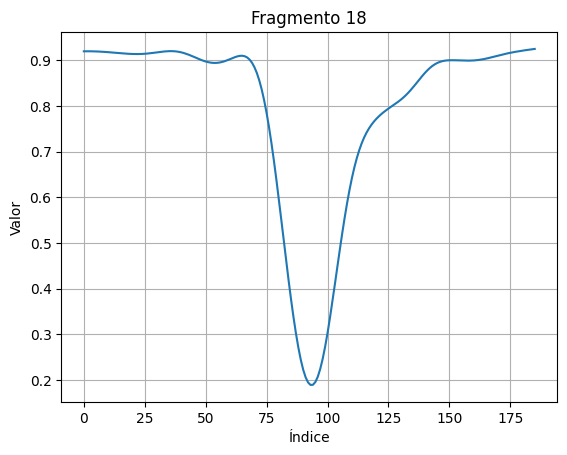

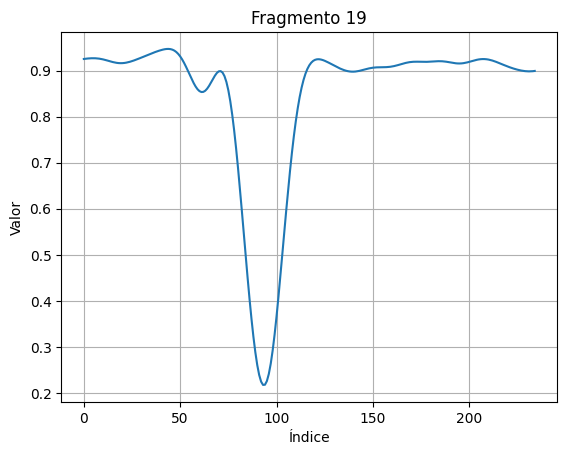

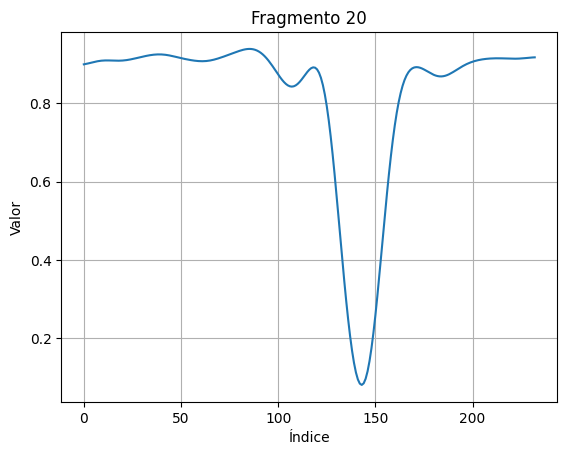

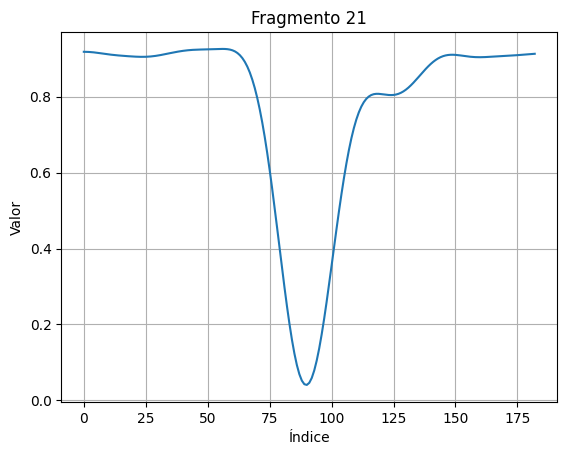

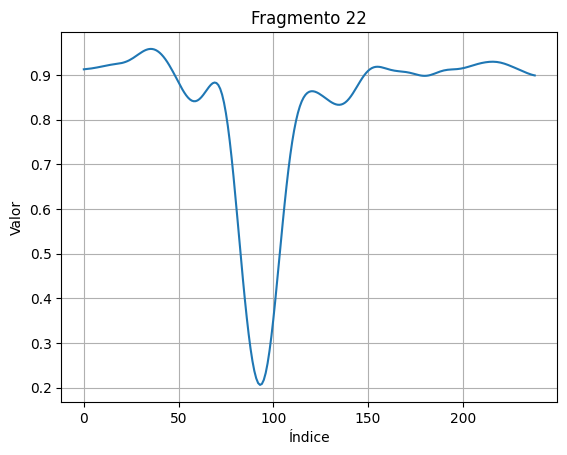

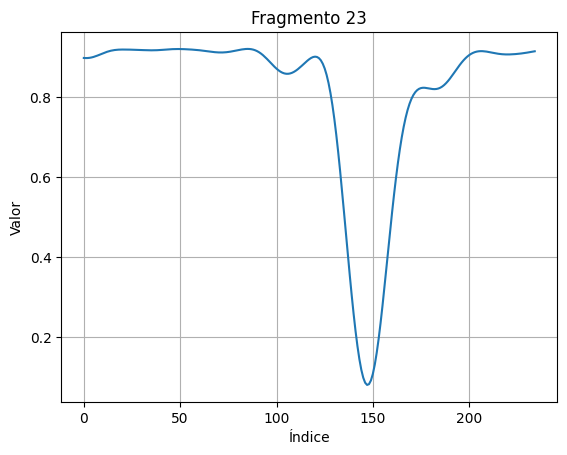

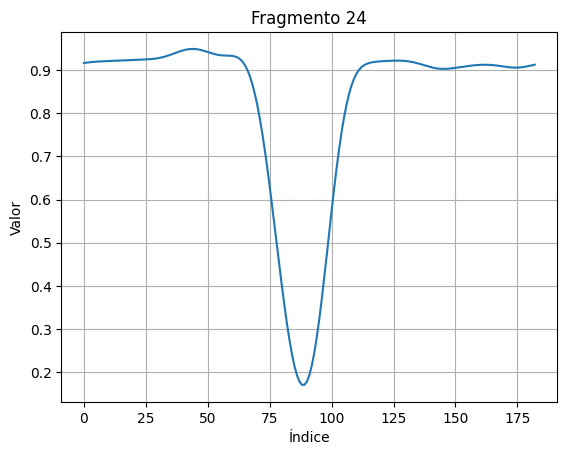

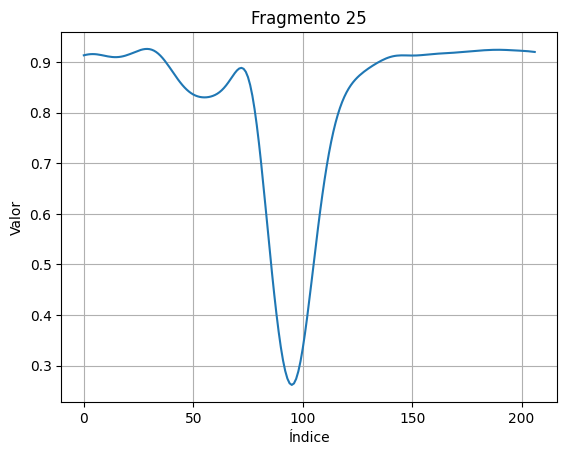

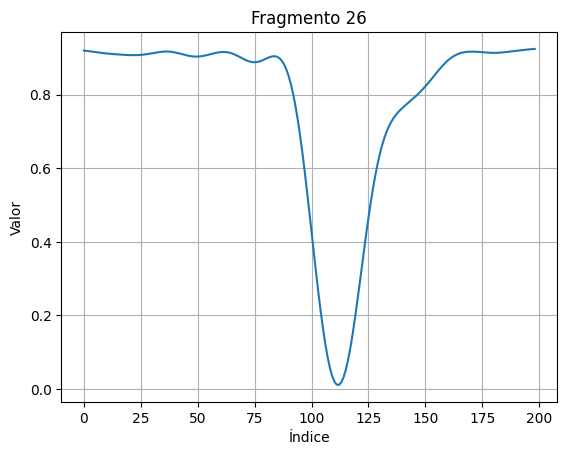

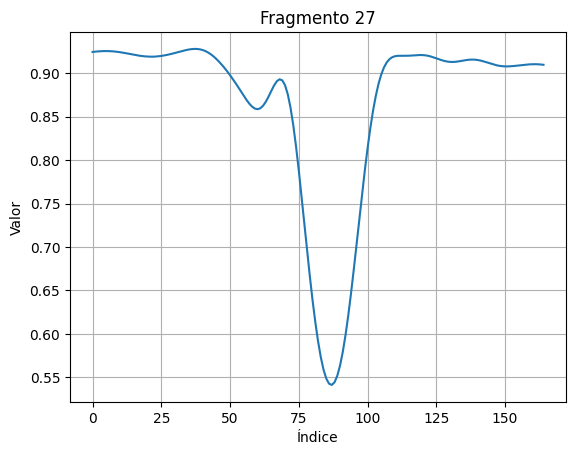

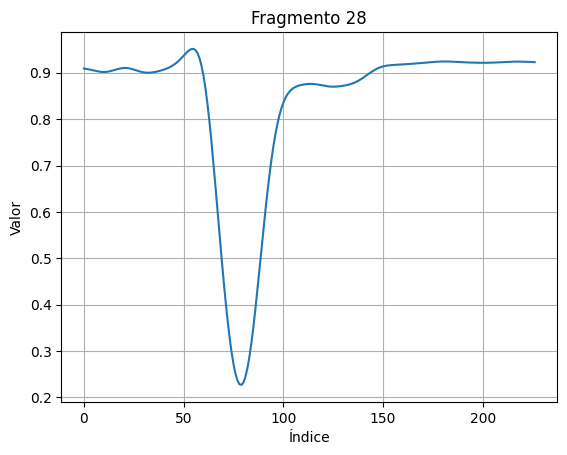

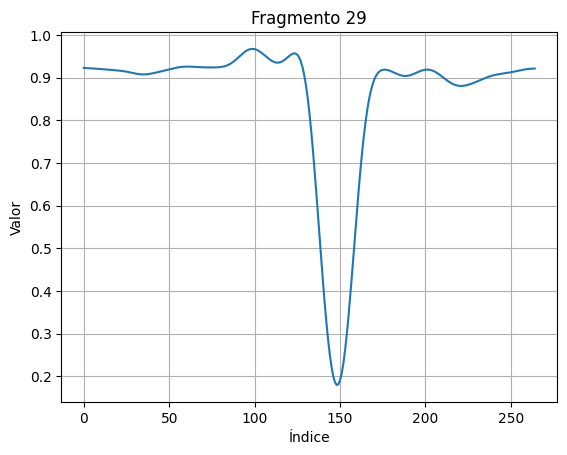

In [51]:
fragments = []

# Fragmentar la señal alrededor de cada pico y plotear cada fragmento
for i, peak_index in enumerate(peaks):
    print 
    if i == 0:
        start_index = peak_index - int(distances_between_peaks[i] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    elif i == len(peaks)-1:
        start_index = peak_index - int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i-1] / 2)
    else:
        start_index = peaks[i-1] + int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    fragment = array_dreta[start_index:end_index]
    
    fragment_values = fragment['ACC_Z']
    
    # Plotear el fragmento
    plt.figure()
    plt.plot(fragment_values)
    plt.title(f"Fragmento {i+1}")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()
    
    fragments.append(fragment)
    
    

    

In [52]:

# # Directorio donde se guardarán los archivos CSV
# directory = "C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/fragmentos"

# # Si el directorio no existe, créalo
# if not os.path.exists(directory):
#     os.makedirs(directory)

# # Itera sobre los fragmentos y guárdalos como archivos CSV
# for i, fragment in enumerate(fragments):
#     # Nombre del archivo CSV
#     filename = os.path.join(directory, f"derecha_J1_{i+1}.csv")
    
#     # Abre el archivo CSV en modo escritura
#     with open(filename, mode='w', newline='') as file:
#         writer = csv.writer(file)
        
#         # Escribe los datos del fragmento en el archivo CSV
#         for row in fragment:
#             writer.writerow(row)


# REVES DE ACC

In [53]:
#realizamos lo mismo para el reves 

Media de la señal: 0.44302489683241647
Altura del pico: 0.12027654391705112
Distancia media entre picos: 211.85714285714286
Número total de golpes: 29


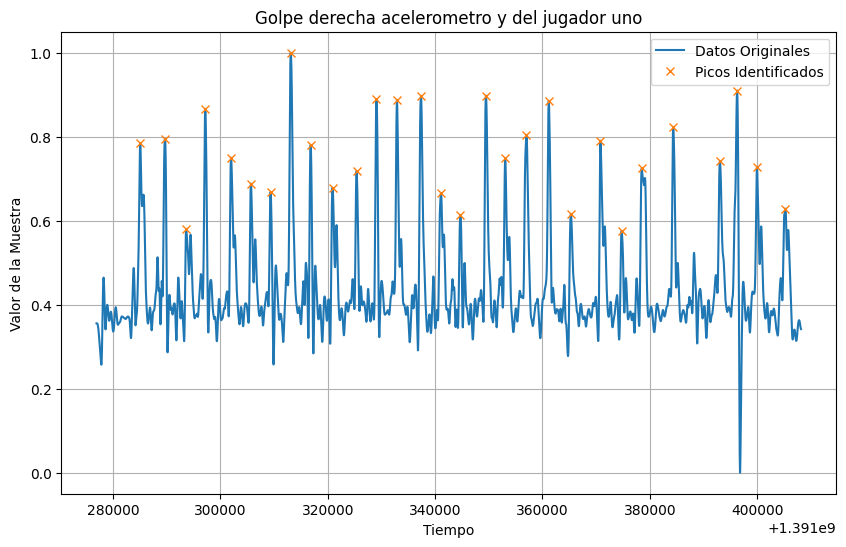

In [54]:
# Llamar a la función con los datos
peaks = analyze_signal(array_reves, 'ACC_X')

Media de la señal: 0.15720419331468508
Altura del pico: 0.1943620175939157
Distancia media entre picos: 203.93103448275863
Número total de golpes: 30


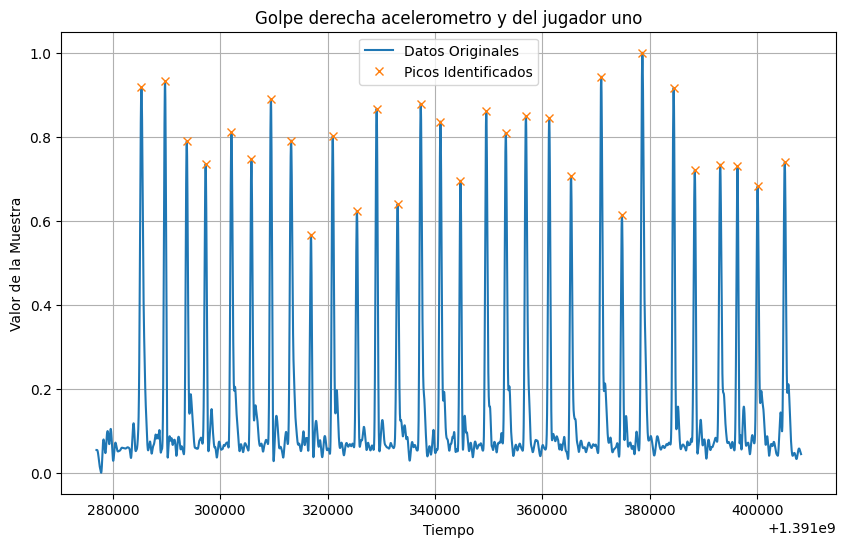

In [55]:
peaks = analyze_signal(array_reves, 'ACC_Y')

Media de la señal: 0.8299949089401906
Altura del pico: 0.1379780435310736
Distancia media entre picos: 211.07142857142858
Número total de golpes: 29


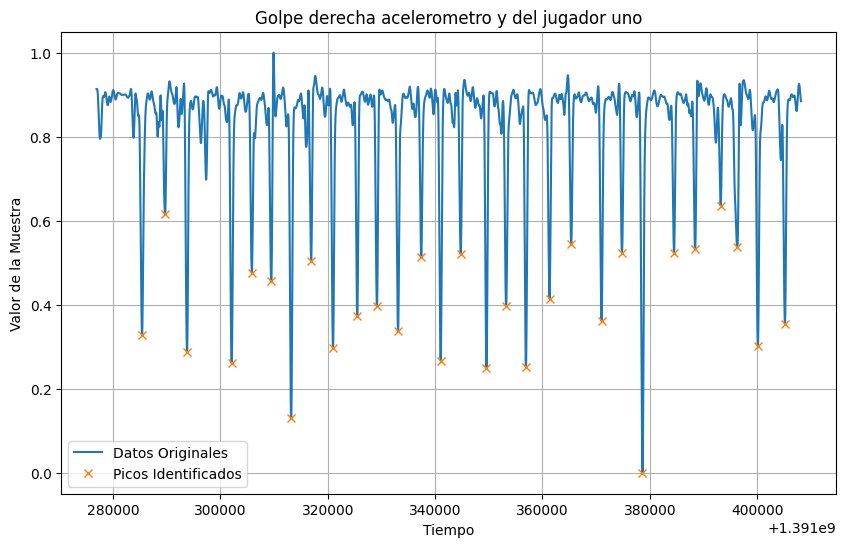

In [56]:
peaks = analyze_signal(array_reves, 'ACC_Z')

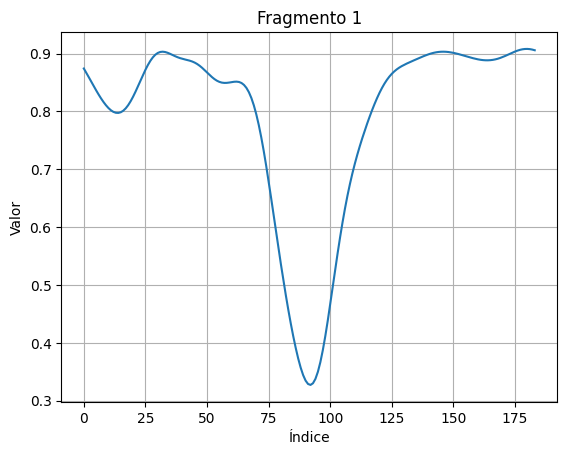

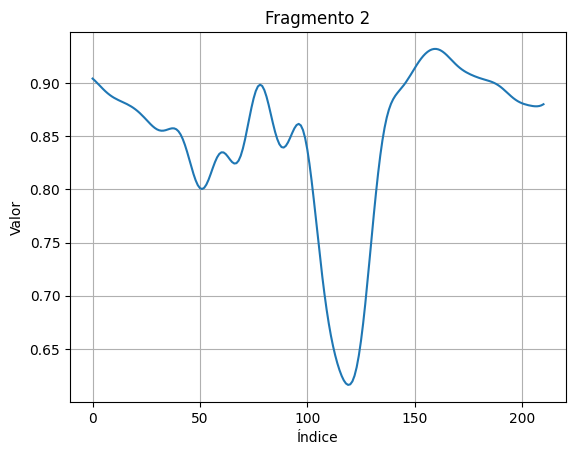

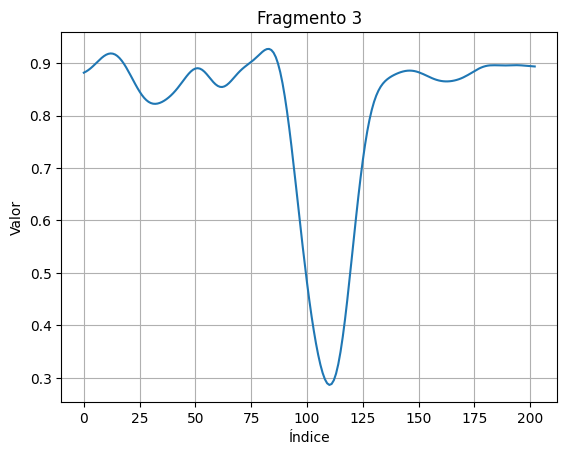

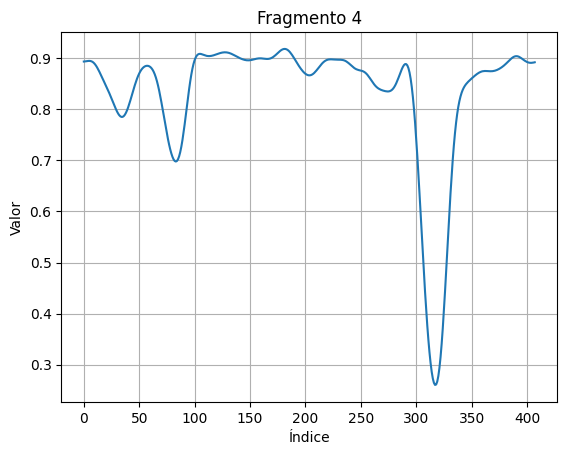

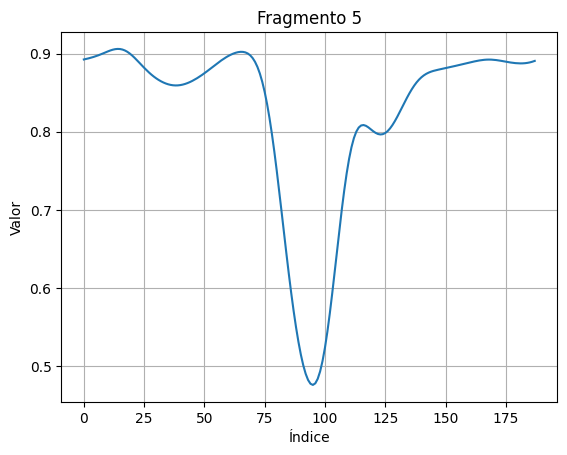

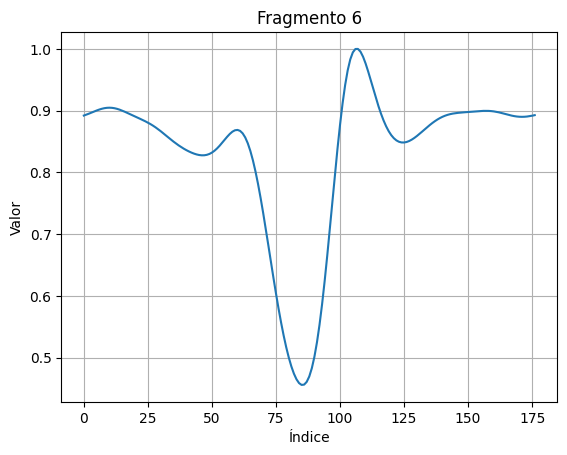

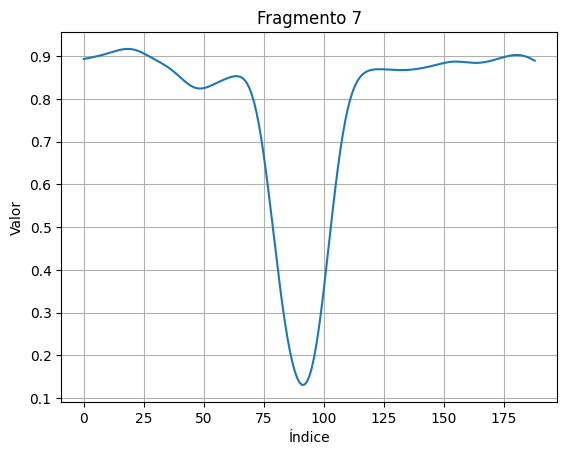

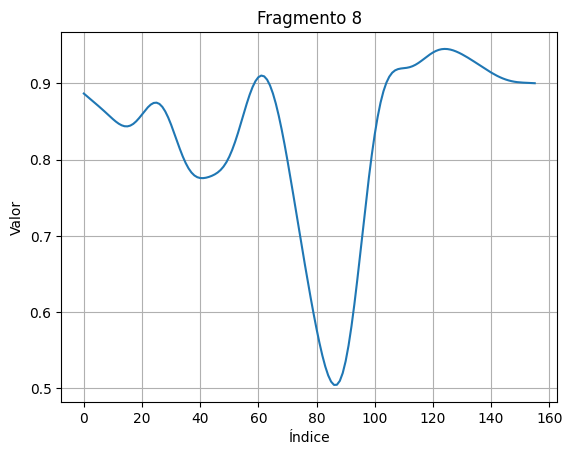

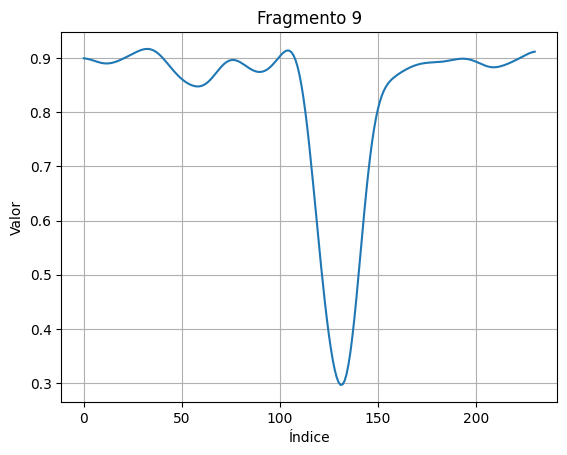

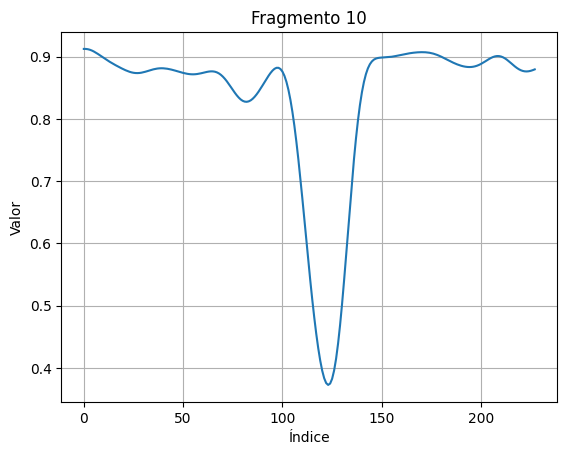

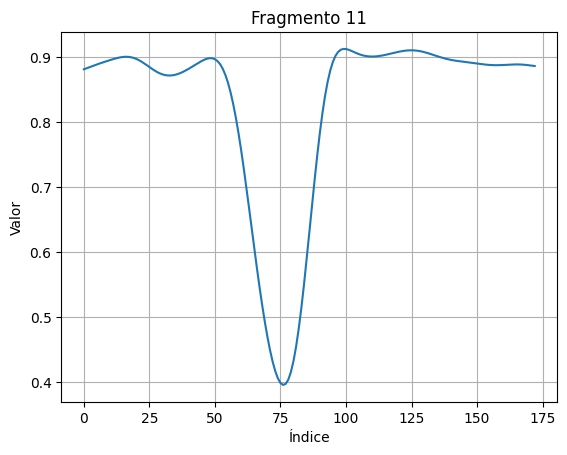

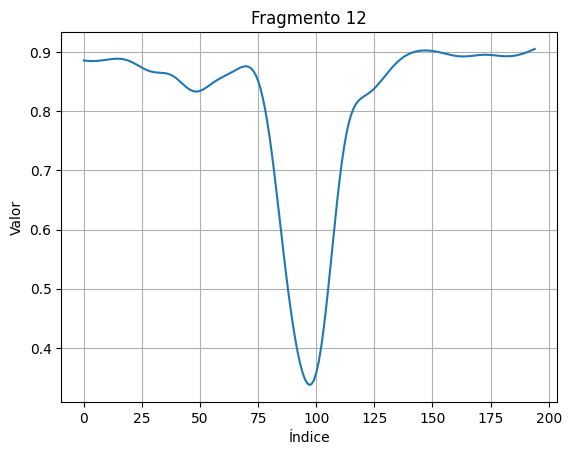

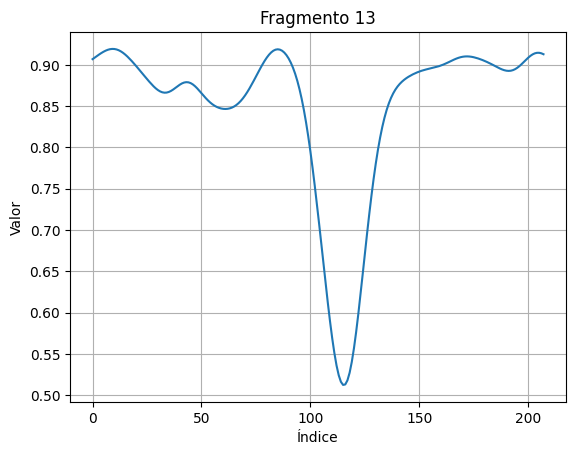

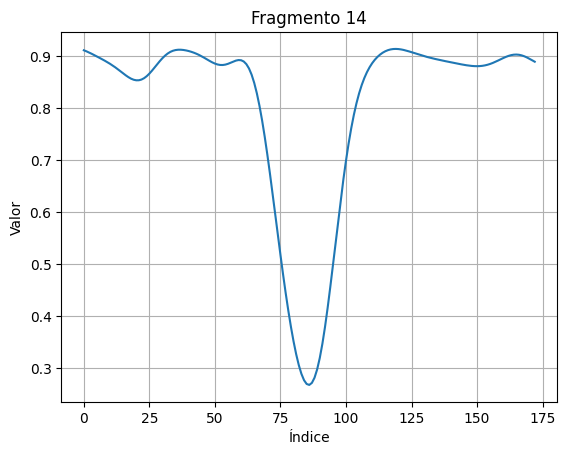

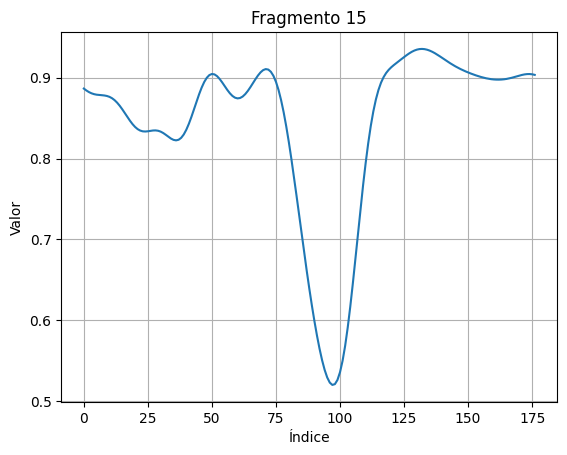

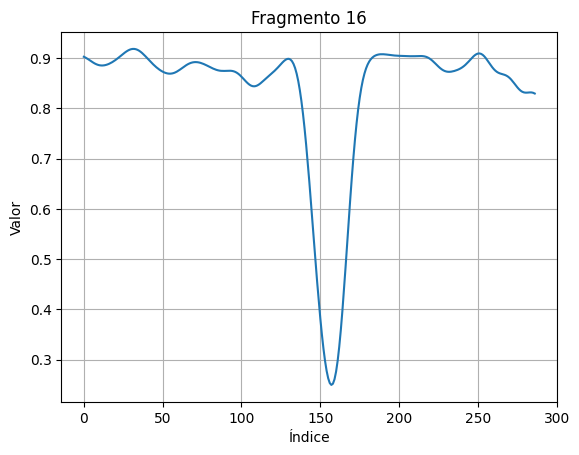

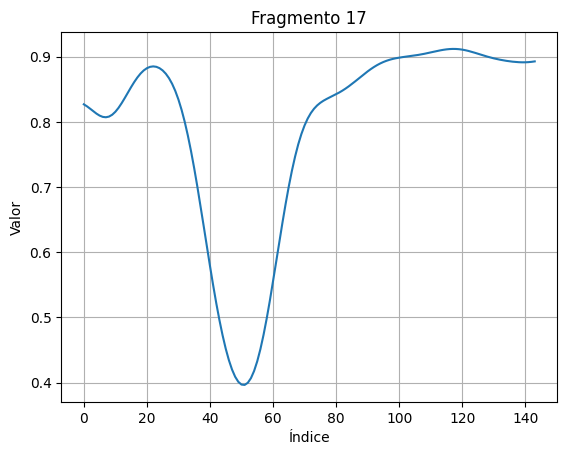

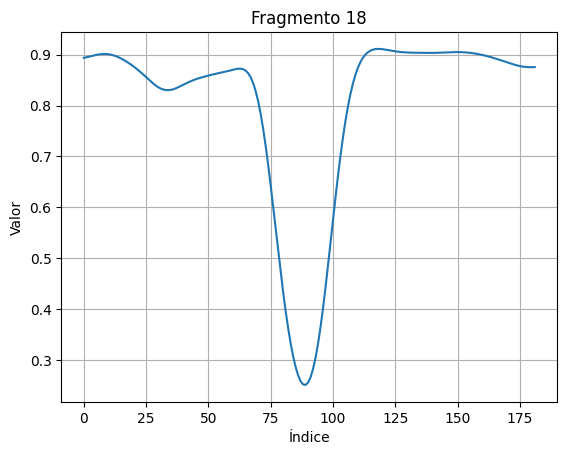

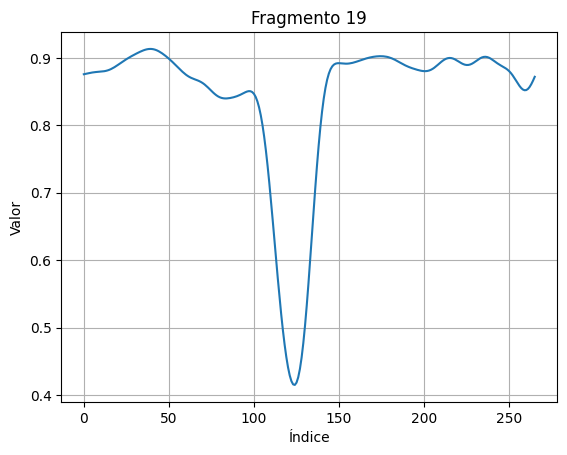

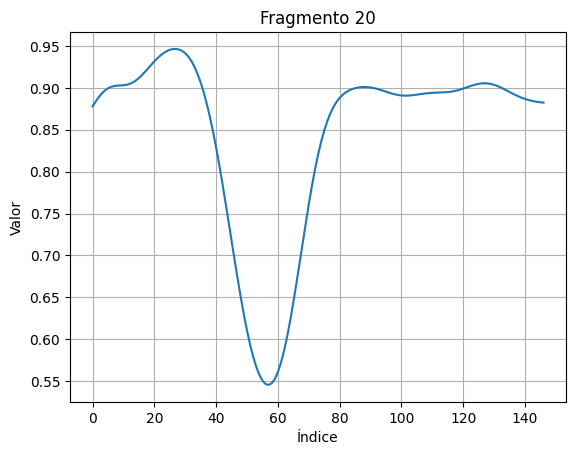

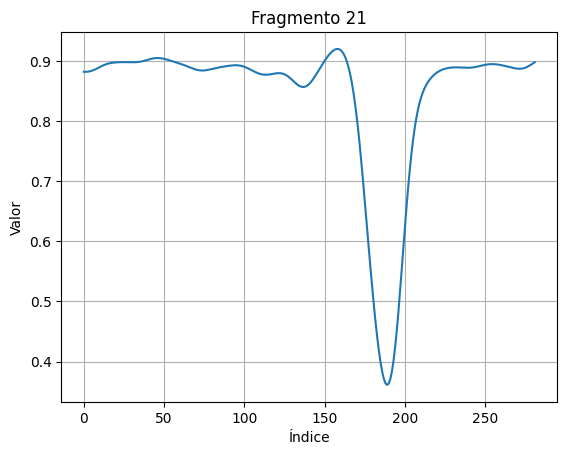

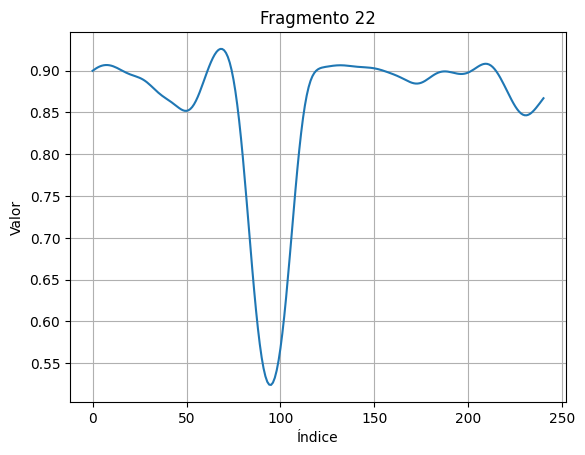

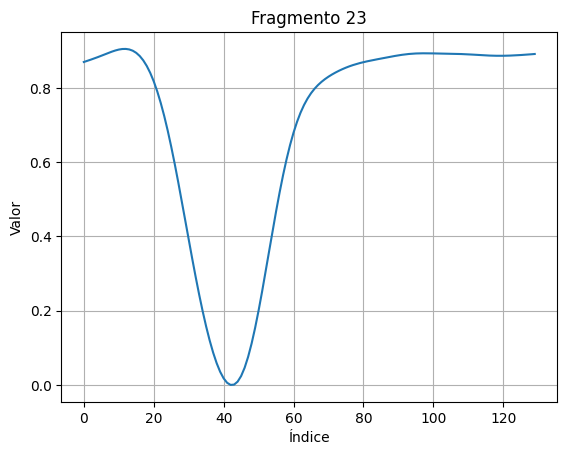

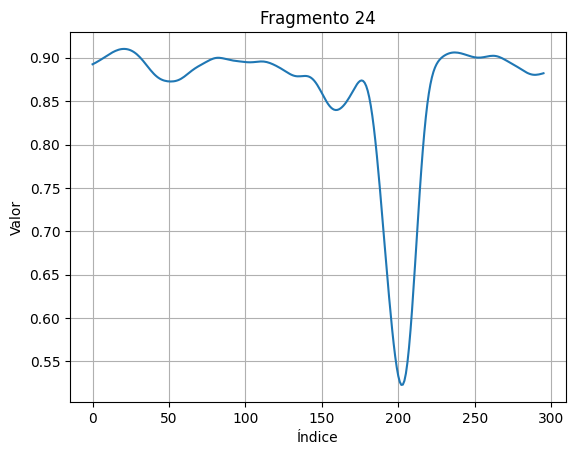

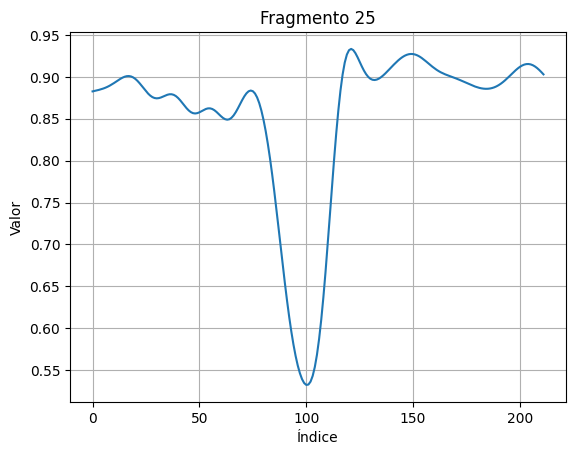

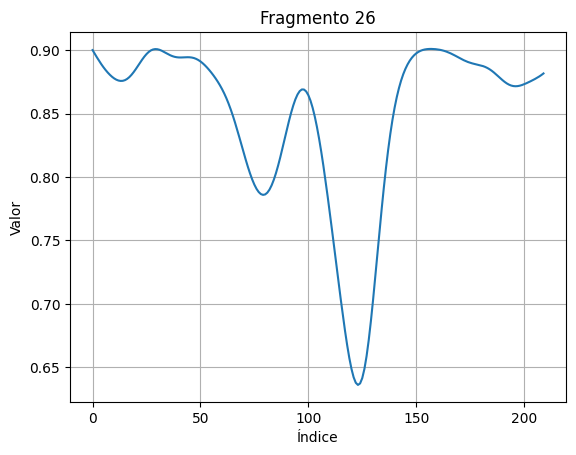

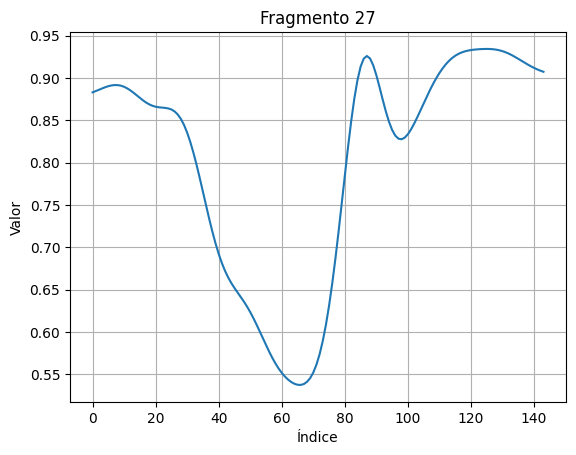

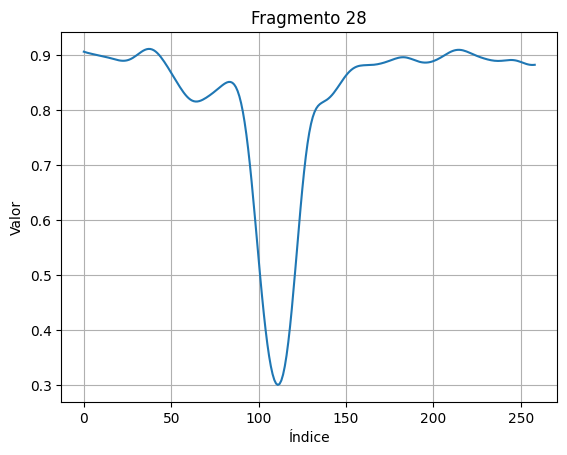

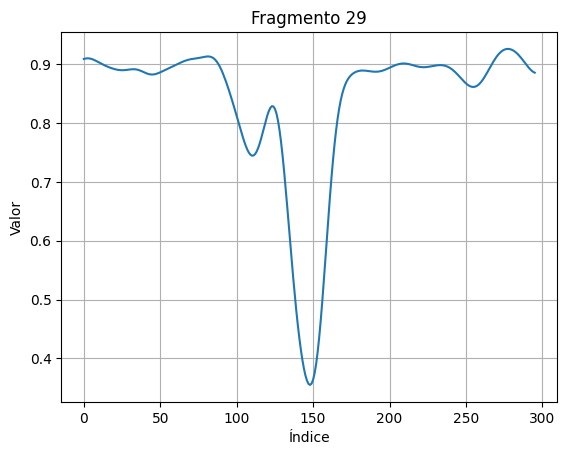

In [57]:
fragments = []

# Fragmentar la señal alrededor de cada pico y plotear cada fragmento
for i, peak_index in enumerate(peaks):
    print 
    if i == 0:
        start_index = peak_index - int(distances_between_peaks[i] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    elif i == len(peaks)-1:
        start_index = peak_index - int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i-1] / 2)
    else:
        start_index = peaks[i-1] + int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    fragment = array_reves[start_index:end_index]
    
    # Obtener la segunda columna de cada fragmento
    fragment_values = fragment['ACC_Z']
    
    # Plotear el fragmento
    plt.figure()
    plt.plot(fragment_values)
    plt.title(f"Fragmento {i+1}")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()
    
    fragments.append(fragment)
    
    



In [58]:

# # Directorio donde se guardarán los archivos CSV
# directory = "C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/fragmentos"

# # Si el directorio no existe, se crea
# if not os.path.exists(directory):
#     os.makedirs(directory)

# # Itera sobre los fragmentos y guárdalos como archivos CSV
# for i, fragment in enumerate(fragments):
#     # Nombre del archivo CSV
#     filename = os.path.join(directory, f"reves_J1_{i+1}.csv")
    
#     # Abre el archivo CSV en modo escritura
#     with open(filename, mode='w', newline='') as file:
#         writer = csv.writer(file)
        
#         # Escribe los datos del fragmento en el archivo CSV
#         for row in fragment:
#             writer.writerow(row)

# SERVICIO ACC

Media de la señal: 0.3025158852038713
Altura del pico: 0.14078255928827377
Distancia media entre picos: 410.85714285714283
Número total de golpes: 15


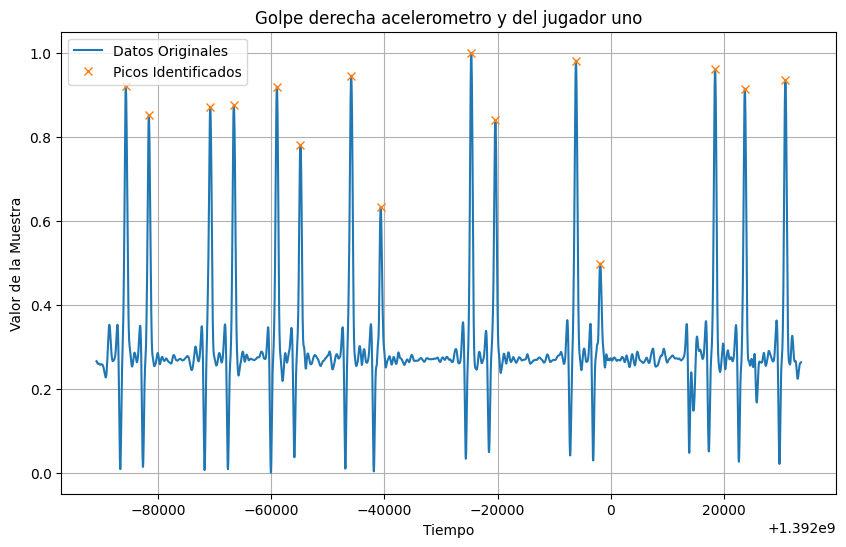

In [59]:

peaks = analyze_signal(array_serve, 'ACC_X')

Media de la señal: 0.3908946331389844
Altura del pico: 0.10426093620034958
Distancia media entre picos: 410.85714285714283
Número total de golpes: 15


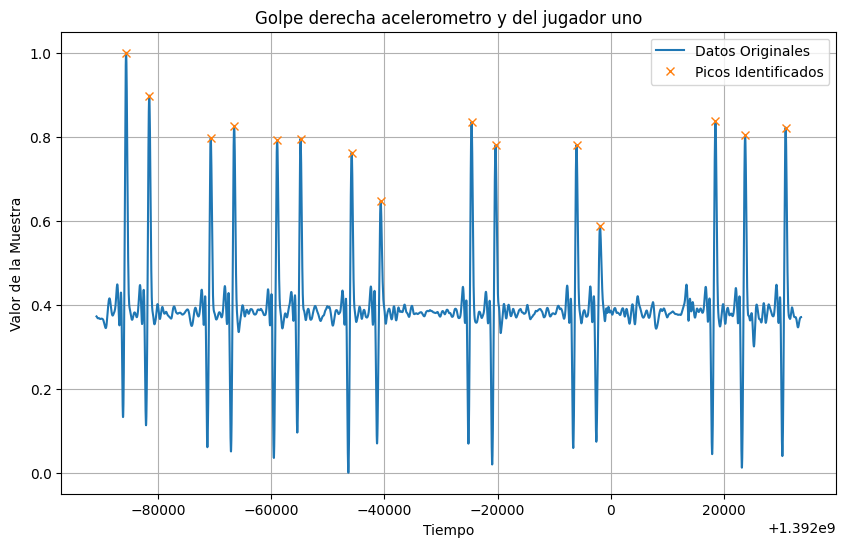

In [60]:
peaks = analyze_signal(array_serve, 'ACC_Y')

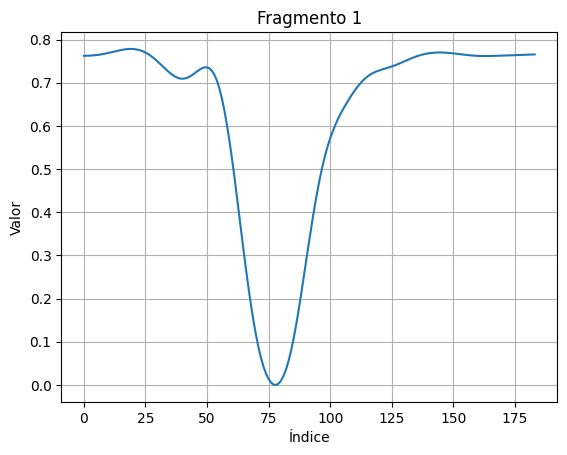

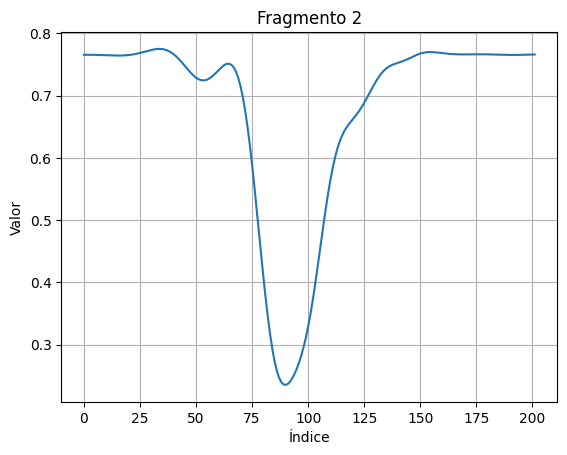

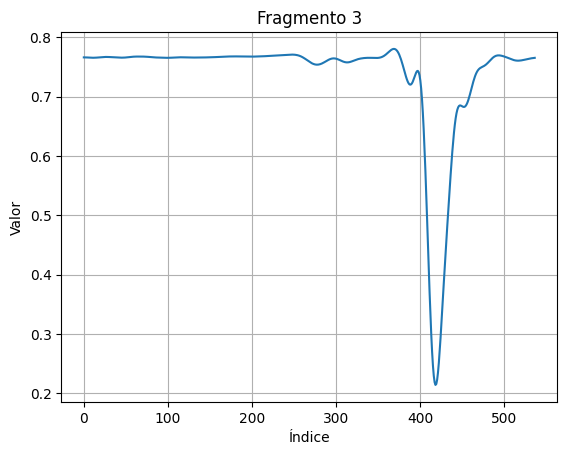

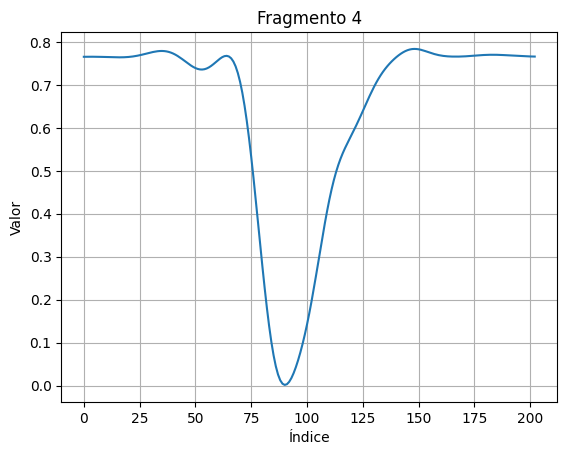

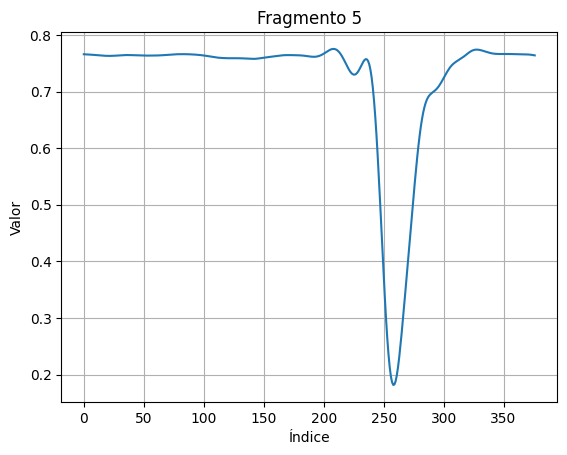

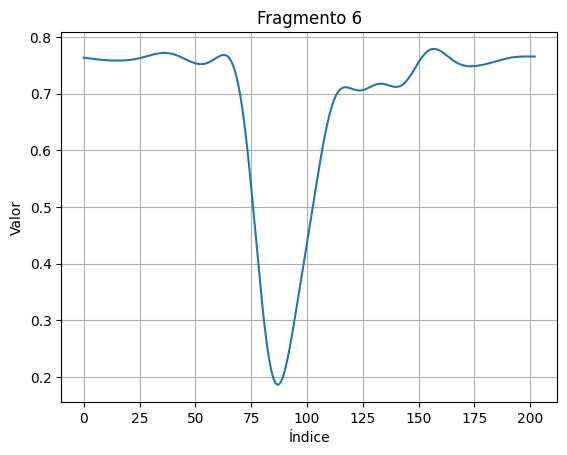

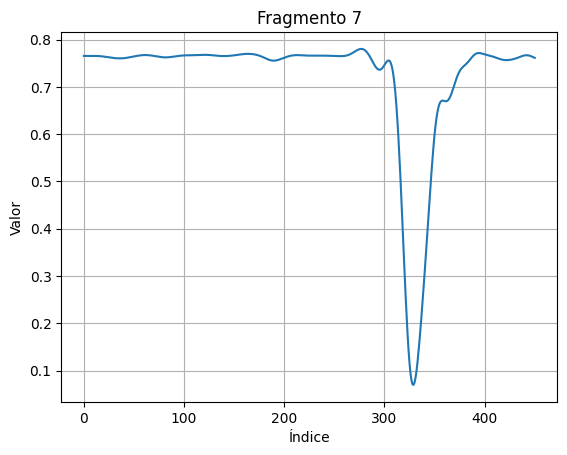

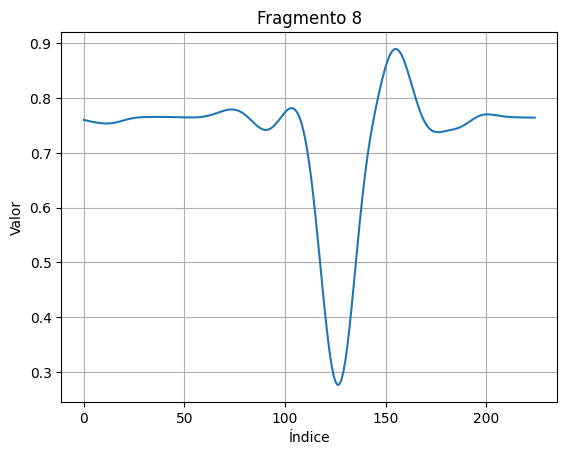

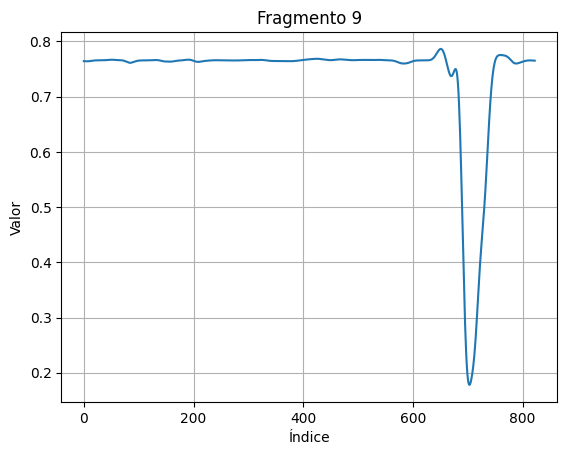

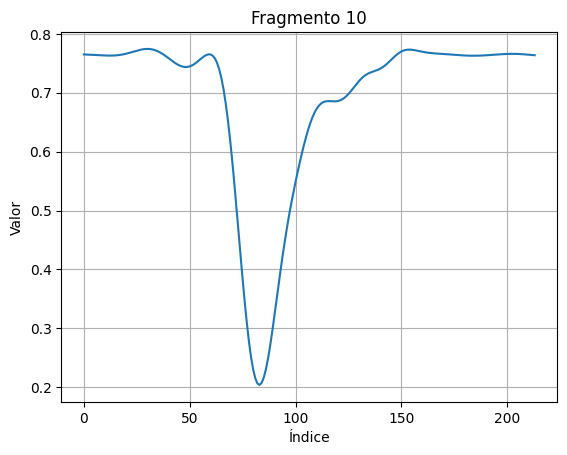

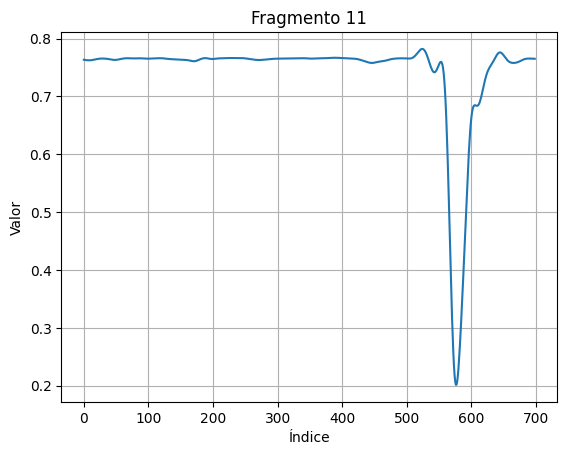

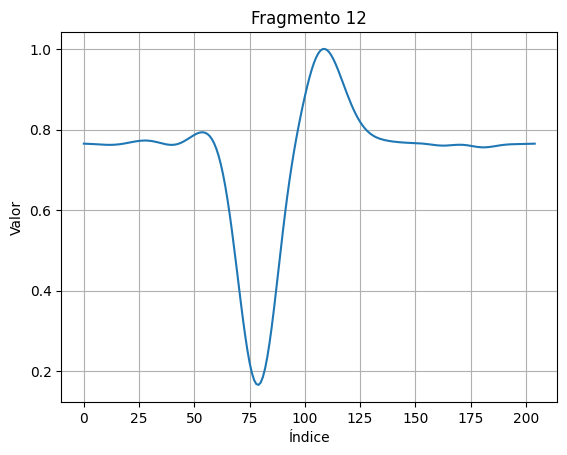

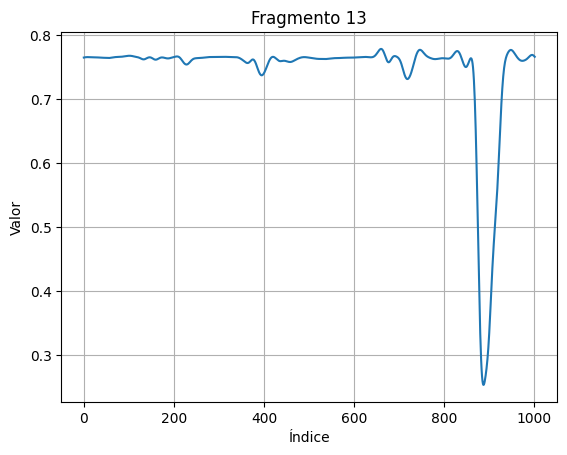

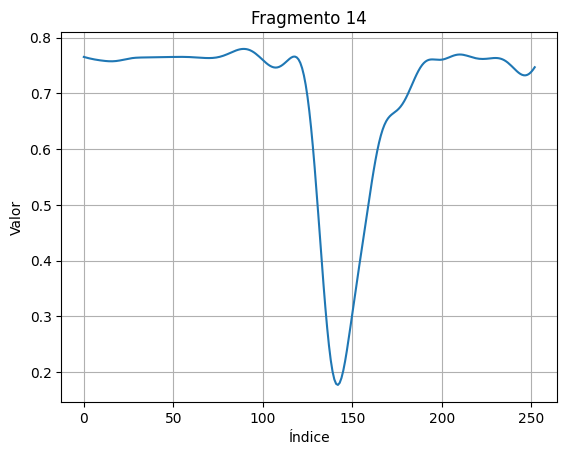

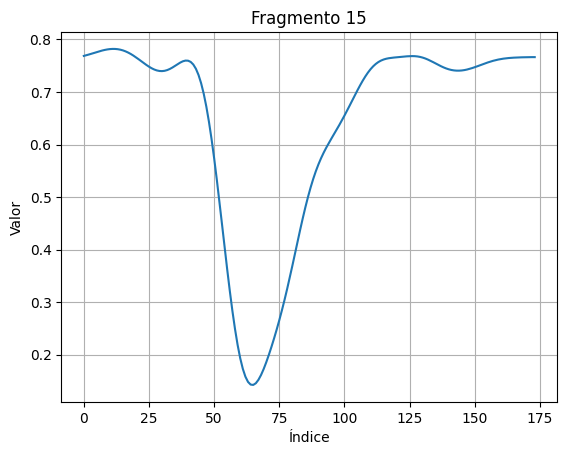

In [61]:
fragments = []

# Fragmentar la señal alrededor de cada pico y plotear cada fragmento
for i, peak_index in enumerate(peaks):
    print 
    if i == 0:
        start_index = peak_index - int(distances_between_peaks[i] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    elif i == len(peaks)-1:
        start_index = peak_index - int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i-1] / 2)
    else:
        start_index = peaks[i-1] + int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    fragment = array_serve[start_index:end_index]
    
    # Obtener la segunda columna de cada fragmento
    fragment_values = fragment['ACC_Z']
    
    # Plotear el fragmento
    plt.figure()
    plt.plot(fragment_values)
    plt.title(f"Fragmento {i+1}")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()
    
    fragments.append(fragment)
    
    


In [62]:

# # Directorio donde se guardarán los archivos CSV
# directory = "C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/fragmentos"

# # Si el directorio no existe, créalo
# if not os.path.exists(directory):
#     os.makedirs(directory)

# # Itera sobre los fragmentos y guárdalos como archivos CSV
# for i, fragment in enumerate(fragments):
#     # Nombre del archivo CSV
#     filename = os.path.join(directory, f"serve_J1_{i+1}.csv")
    
#     # Abre el archivo CSV en modo escritura
#     with open(filename, mode='w', newline='') as file:
#         writer = csv.writer(file)
        
#         # Escribe los datos del fragmento en el archivo CSV
#         for row in fragment:
#             writer.writerow(row)

# SMASH ACC

Media de la señal: 0.30957847087880125
Altura del pico: 0.16519911612180024
Distancia media entre picos: 188.64285714285714
Número total de golpes: 15


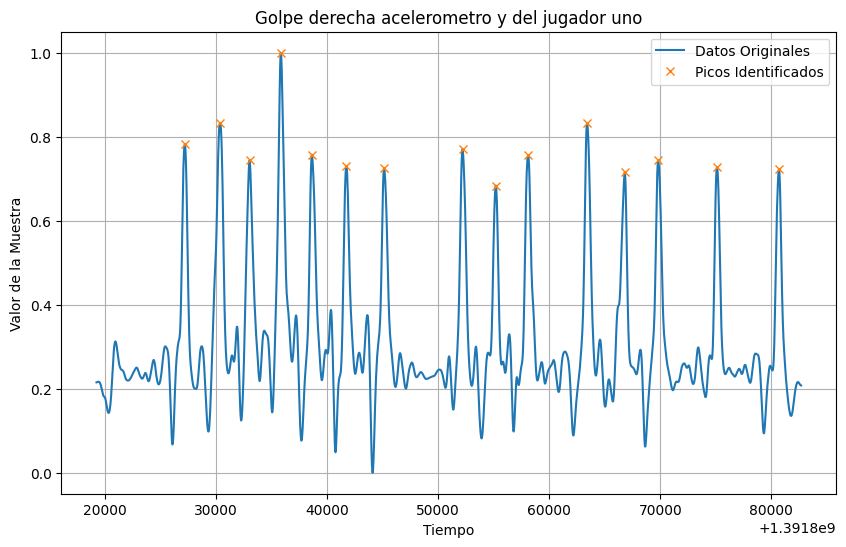

In [63]:

peaks = analyze_signal(array_smash, 'ACC_X')

Media de la señal: 0.3749163868142322
Altura del pico: 0.14686646596381156
Distancia media entre picos: 188.42857142857142
Número total de golpes: 15


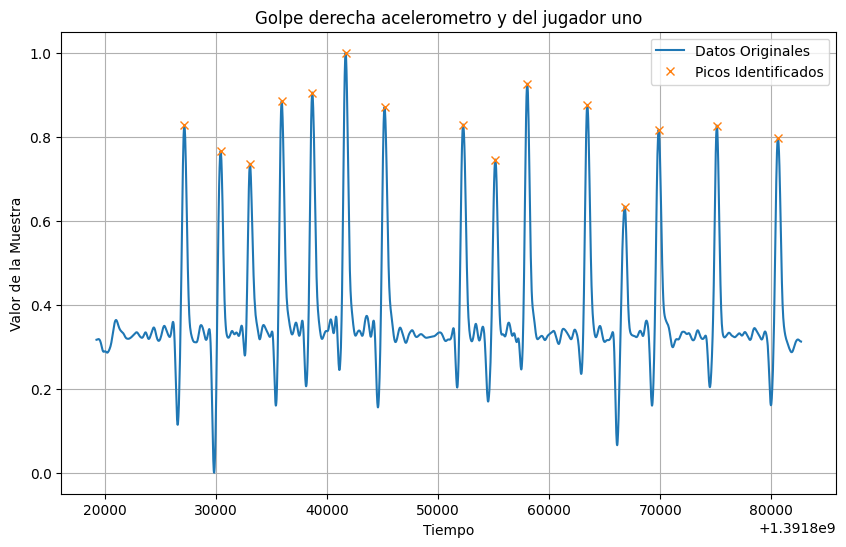

In [64]:
peaks = analyze_signal(array_smash, 'ACC_Y')

Media de la señal: 0.8554167074990109
Altura del pico: 0.1815878452869438
Distancia media entre picos: 188.57142857142858
Número total de golpes: 15


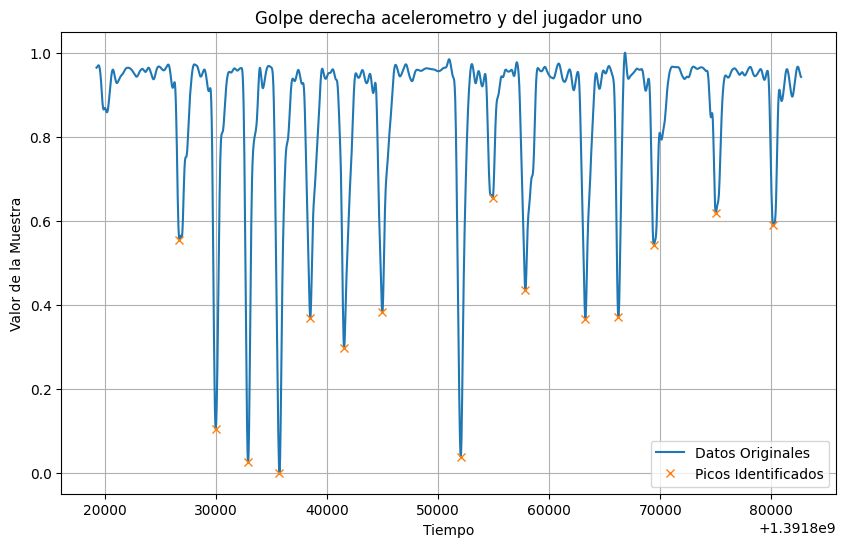

In [65]:
peaks = analyze_signal(array_smash, 'ACC_Z')

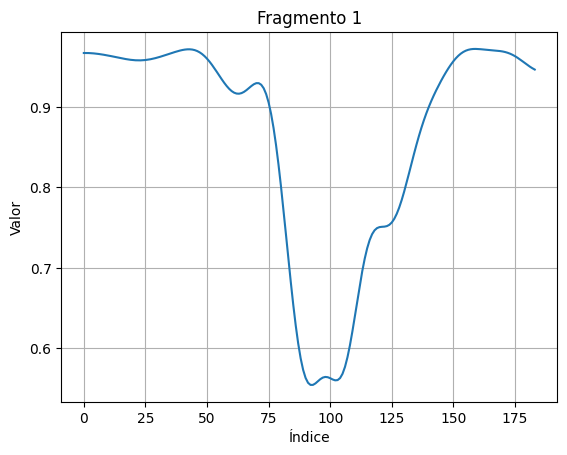

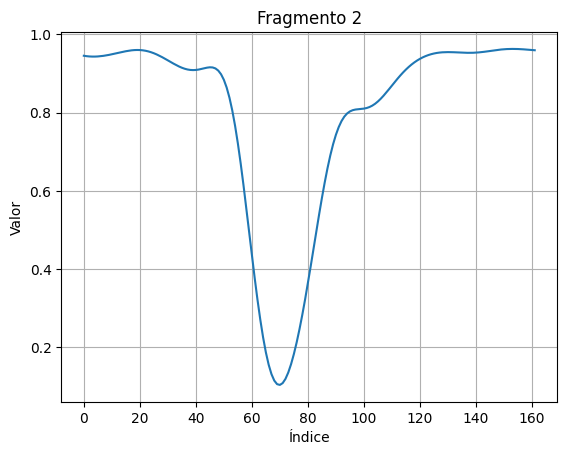

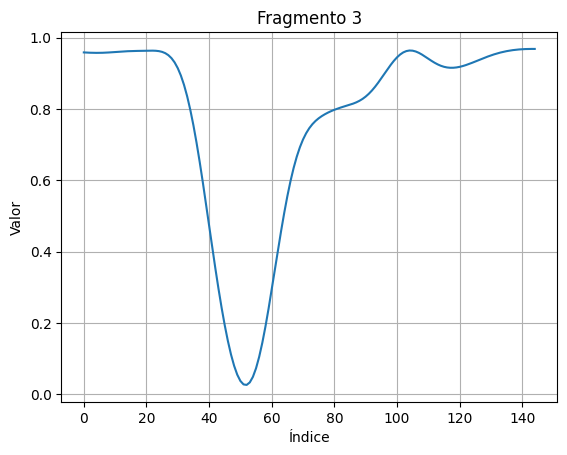

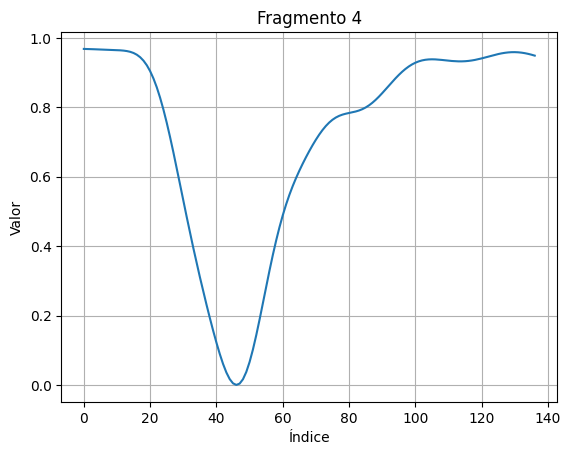

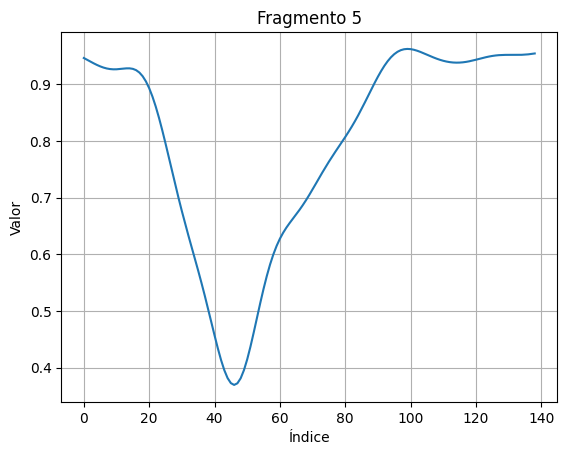

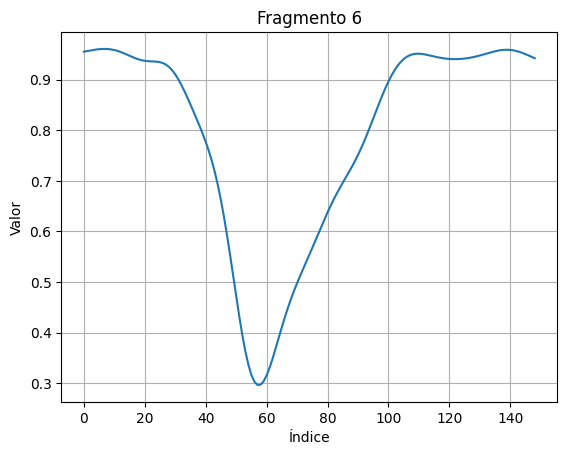

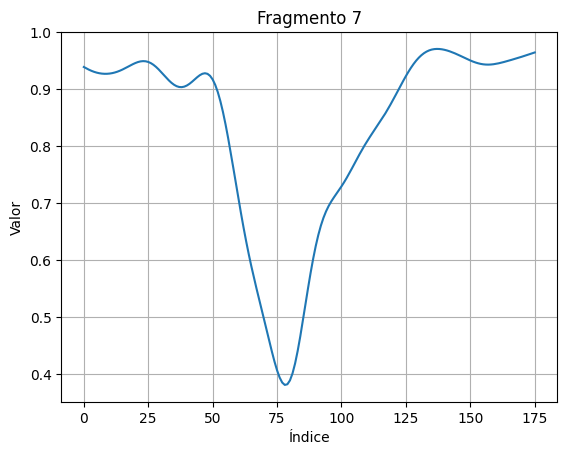

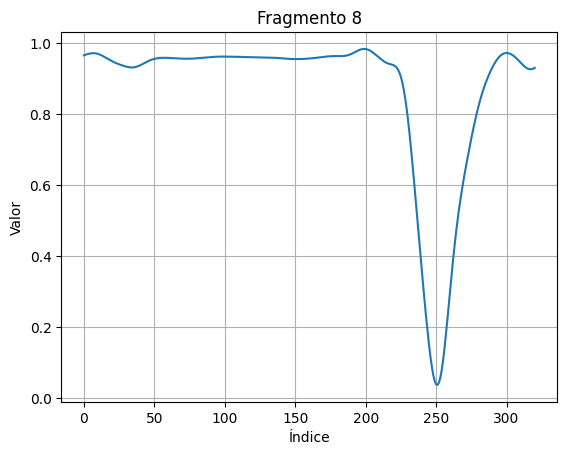

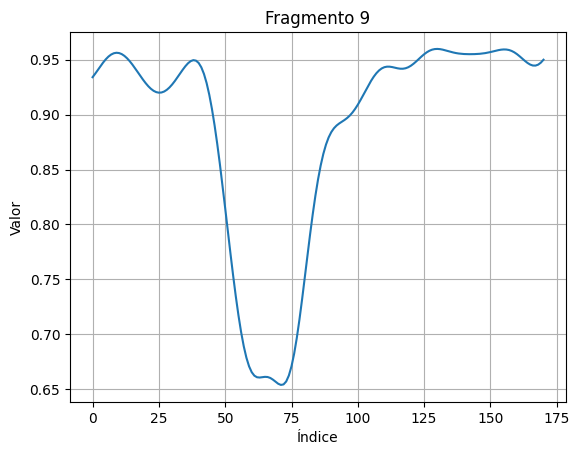

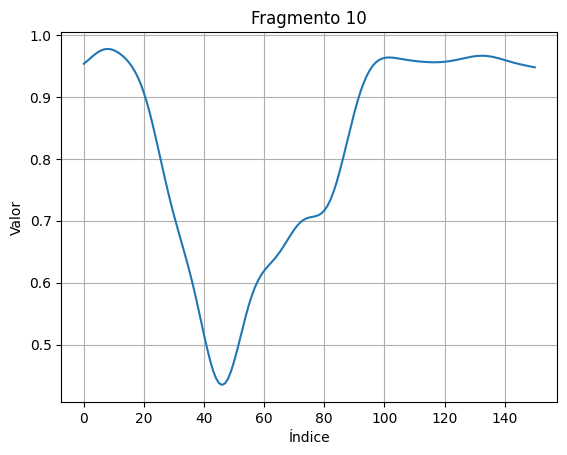

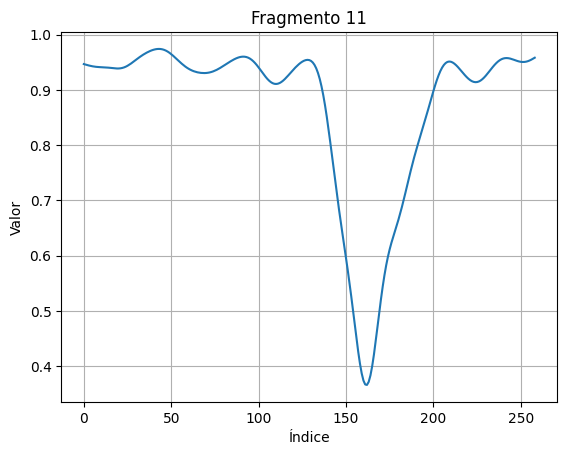

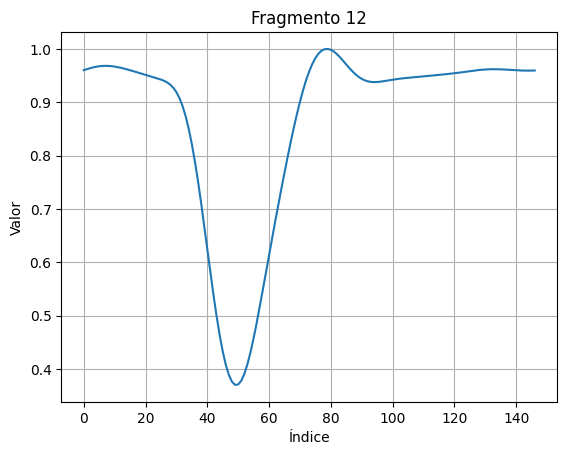

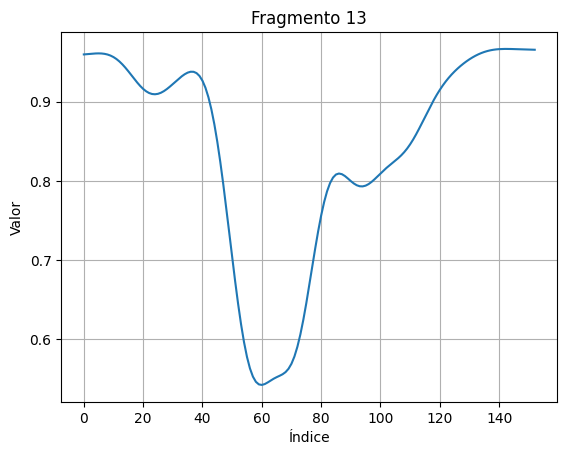

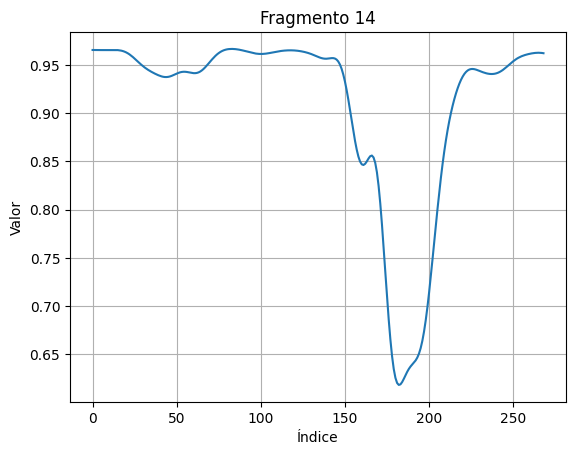

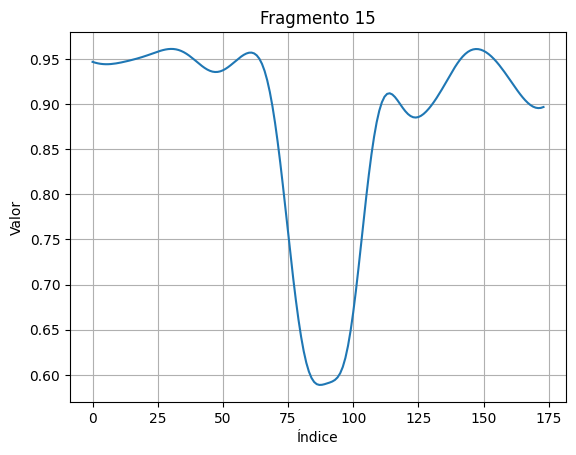

In [66]:
fragments = []

# Fragmentar la señal alrededor de cada pico y plotear cada fragmento
for i, peak_index in enumerate(peaks):
    print 
    if i == 0:
        start_index = peak_index - int(distances_between_peaks[i] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    elif i == len(peaks)-1:
        start_index = peak_index - int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i-1] / 2)
    else:
        start_index = peaks[i-1] + int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    fragment = array_smash[start_index:end_index]
    
    # Obtener la segunda columna de cada fragmento
    fragment_values = fragment['ACC_Z']
    
    # Plotear el fragmento
    plt.figure()
    plt.plot(fragment_values)
    plt.title(f"Fragmento {i+1}")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()
    
    fragments.append(fragment)
    
    


In [67]:

# # Directorio donde se guardarán los archivos CSV
# directory = "C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/fragmentos"

# # Si el directorio no existe, créalo
# if not os.path.exists(directory):
#     os.makedirs(directory)

# # Itera sobre los fragmentos y guárdalos como archivos CSV
# for i, fragment in enumerate(fragments):
#     # Nombre del archivo CSV
#     filename = os.path.join(directory, f"smash_J1_{i+1}.csv")
    
#     # Abre el archivo CSV en modo escritura
#     with open(filename, mode='w', newline='') as file:
#         writer = csv.writer(file)
        
#         # Escribe los datos del fragmento en el archivo CSV
#         for row in fragment:
#             writer.writerow(row)

# VOLEA DERECHA ACC

Media de la señal: 0.4280186158037152
Altura del pico: 0.17210791315852186
Distancia media entre picos: 163.73684210526315
Número total de golpes: 20


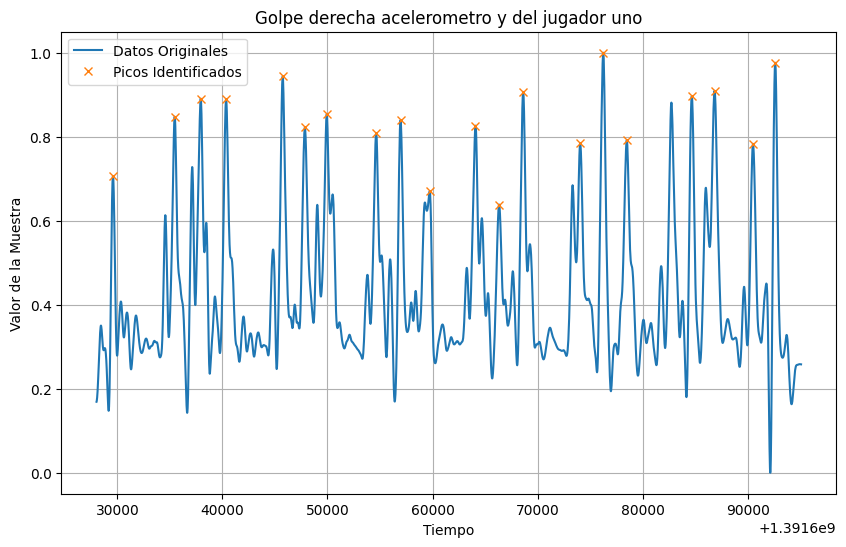

In [68]:
peaks = analyze_signal(array_vd, 'ACC_X')

Media de la señal: 0.2074738062091459
Altura del pico: 0.1772728591905887
Distancia media entre picos: 156.94444444444446
Número total de golpes: 19


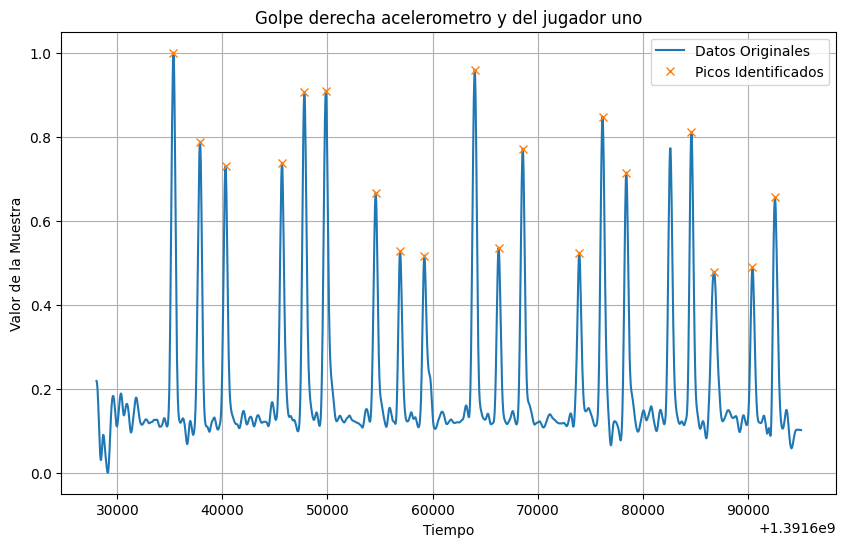

In [69]:
peaks = analyze_signal(array_vd, 'ACC_Y')

Media de la señal: 0.7366727136342381
Altura del pico: 0.1388596305579567
Distancia media entre picos: 194.35714285714286
Número total de golpes: 15


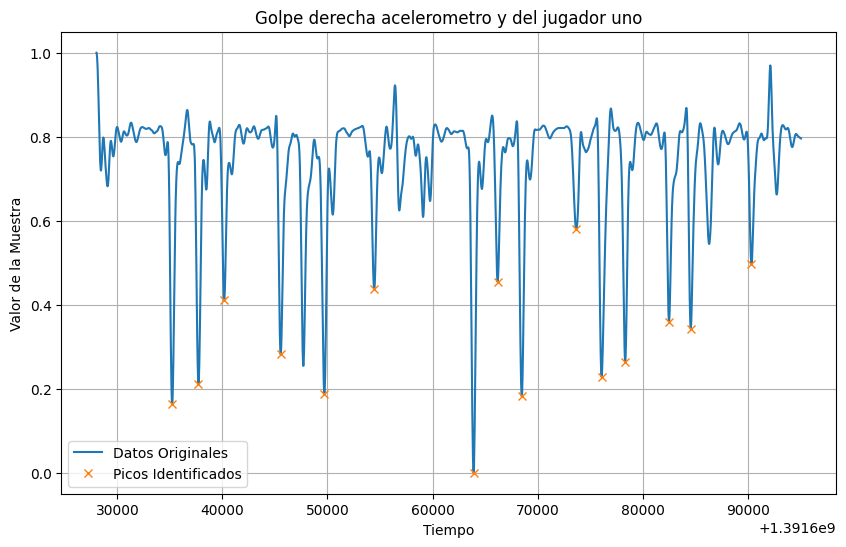

In [70]:
peaks = analyze_signal(array_vd, 'ACC_Z')

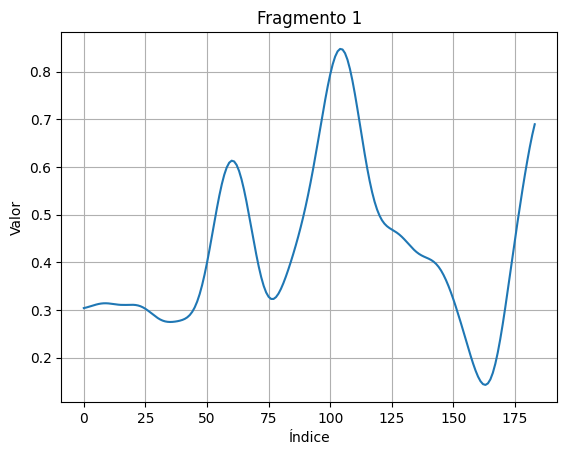

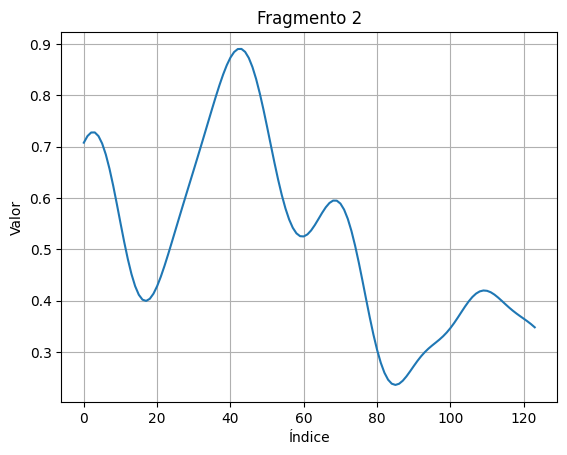

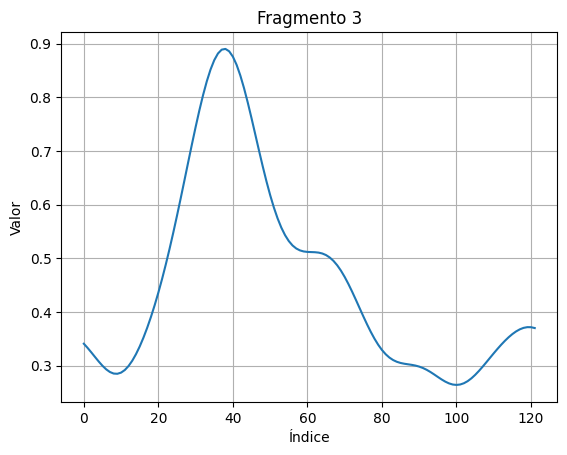

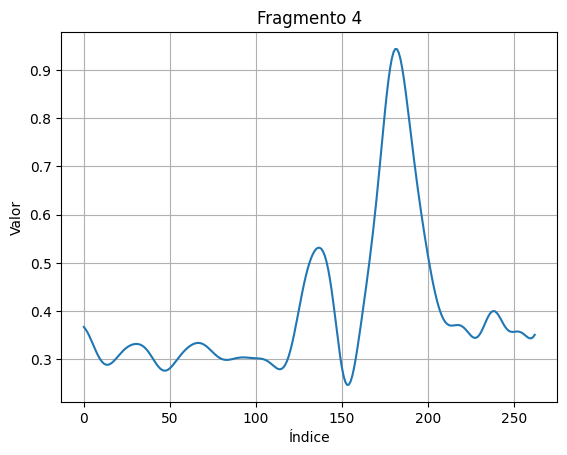

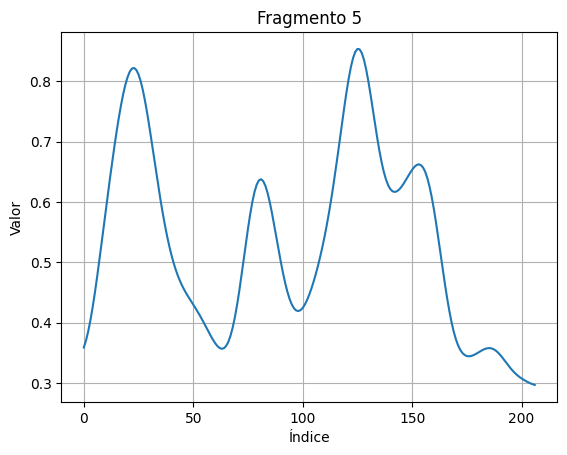

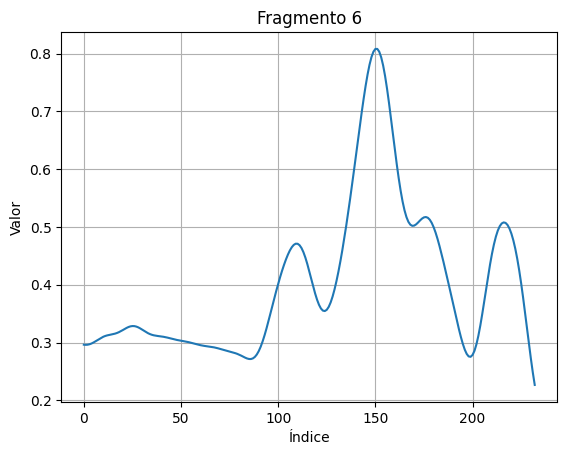

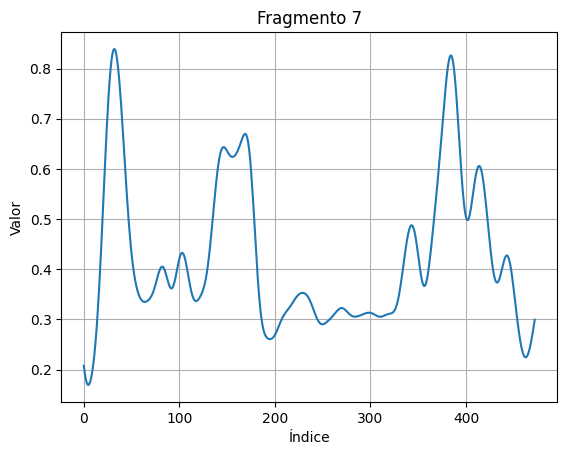

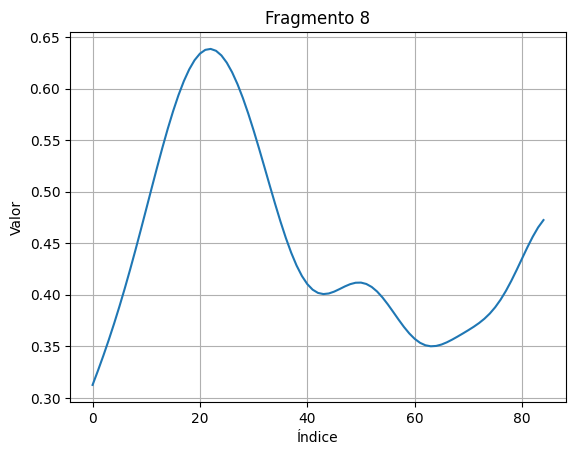

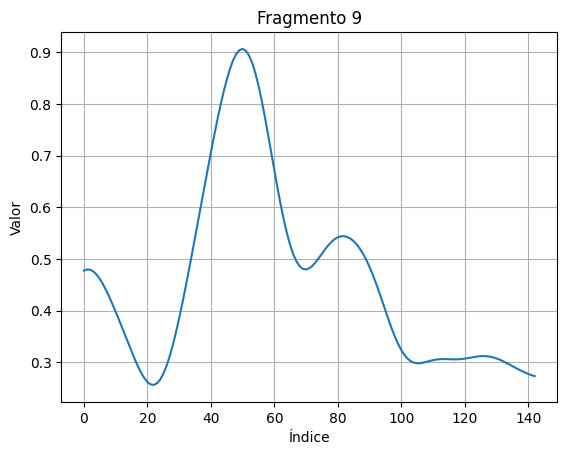

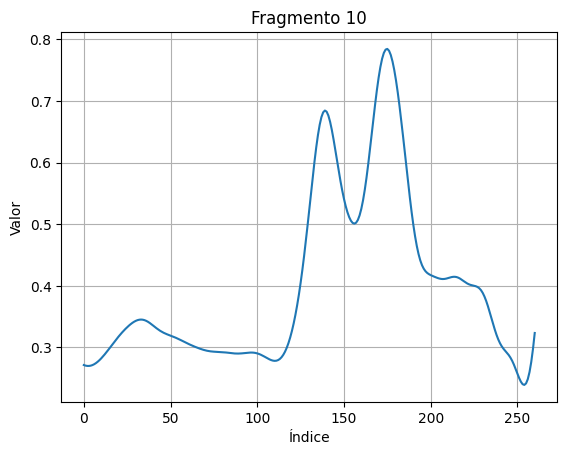

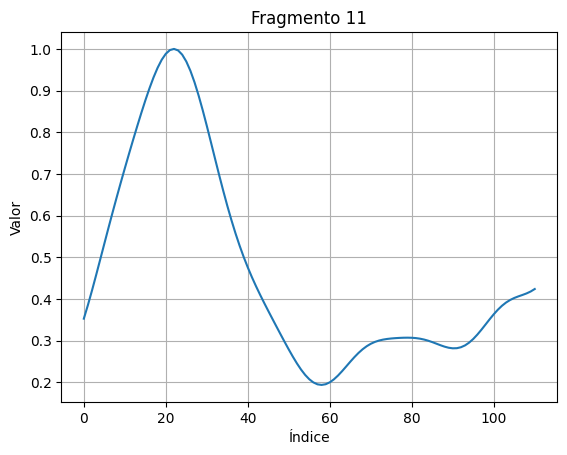

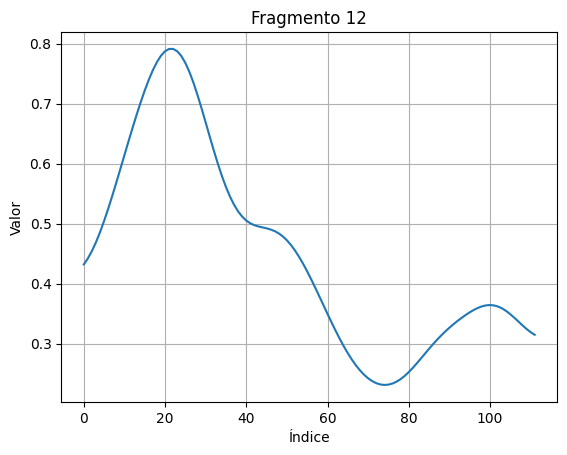

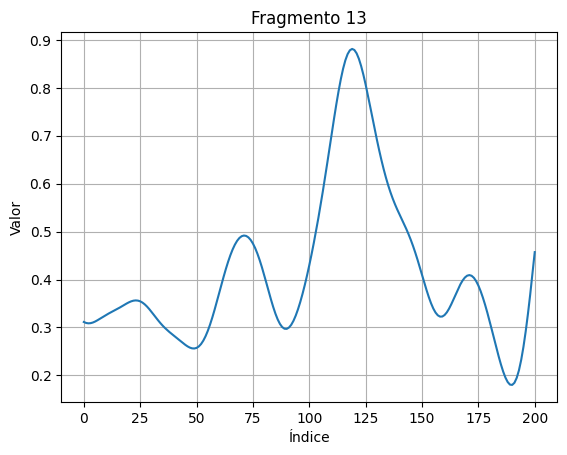

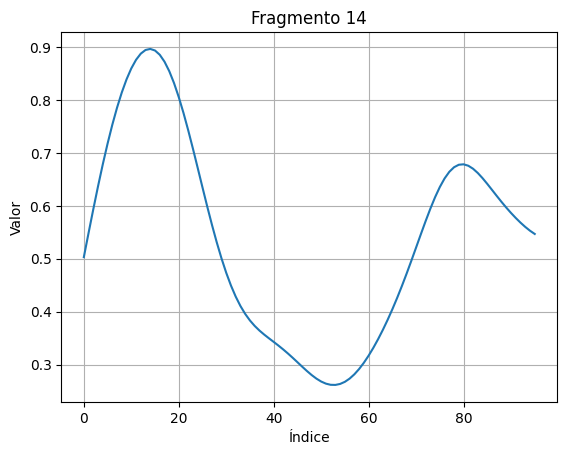

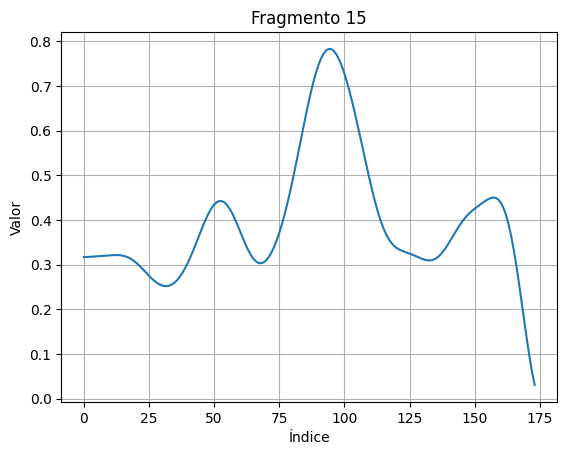

In [71]:
fragments = []

# Fragmentar la señal alrededor de cada pico y plotear cada fragmento
for i, peak_index in enumerate(peaks):
    print 
    if i == 0:
        start_index = peak_index - int(distances_between_peaks[i] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    elif i == len(peaks)-1:
        start_index = peak_index - int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i-1] / 2)
    else:
        start_index = peaks[i-1] + int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    fragment = array_vd[start_index:end_index]
    
    # Obtener la segunda columna de cada fragmento
    fragment_values = fragment['ACC_X']
    
    # Plotear el fragmento
    plt.figure()
    plt.plot(fragment_values)
    plt.title(f"Fragmento {i+1}")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()
    
    fragments.append(fragment)
    

In [72]:

    

# # Directorio donde se guardarán los archivos CSV
# directory = "C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/fragmentos"

# # Si el directorio no existe, créalo
# if not os.path.exists(directory):
#     os.makedirs(directory)

# # Itera sobre los fragmentos y guárdalos como archivos CSV
# for i, fragment in enumerate(fragments):
#     # Nombre del archivo CSV
#     filename = os.path.join(directory, f"vd_J1_{i+1}.csv")
    
#     # Abre el archivo CSV en modo escritura
#     with open(filename, mode='w', newline='') as file:
#         writer = csv.writer(file)
        
#         # Escribe los datos del fragmento en el archivo CSV
#         for row in fragment:
#             writer.writerow(row)

# VOLEA REVES

Media de la señal: 0.26201761108466326
Altura del pico: 0.12674315121196658
Distancia media entre picos: 168.38888888888889
Número total de golpes: 19


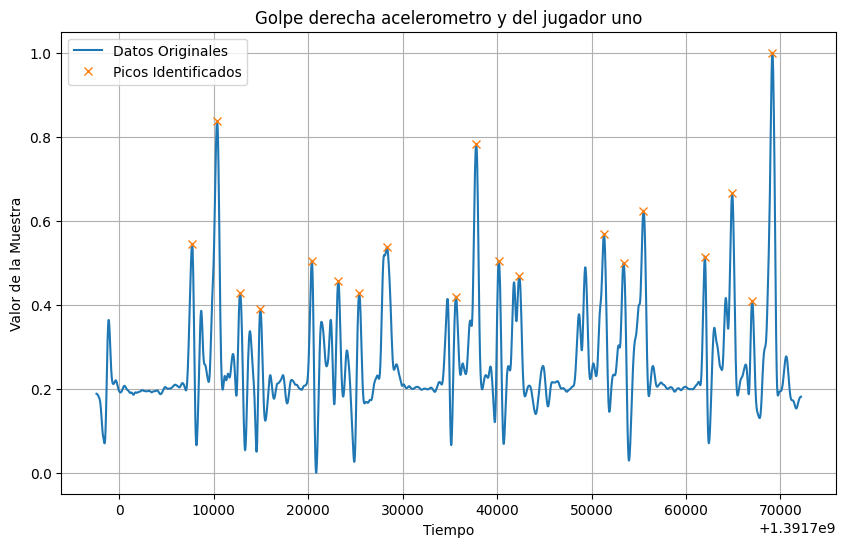

In [73]:
peaks = analyze_signal(array_vr, 'ACC_X')

Media de la señal: 0.2477145819740378
Altura del pico: 0.14133841115968024
Distancia media entre picos: 193.2
Número total de golpes: 16


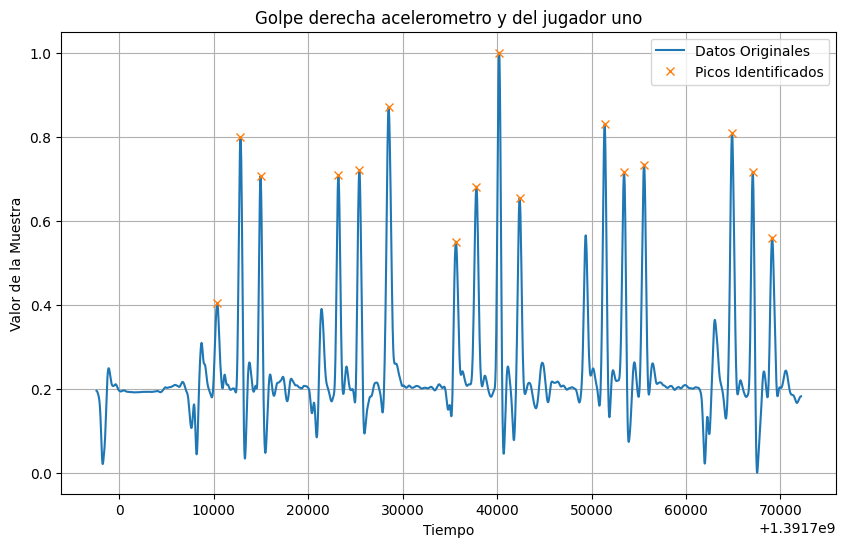

In [74]:
peaks = analyze_signal(array_vr, 'ACC_Y')

Media de la señal: 0.7442420133509022
Altura del pico: 0.09837520724850166
Distancia media entre picos: 291.5
Número total de golpes: 13


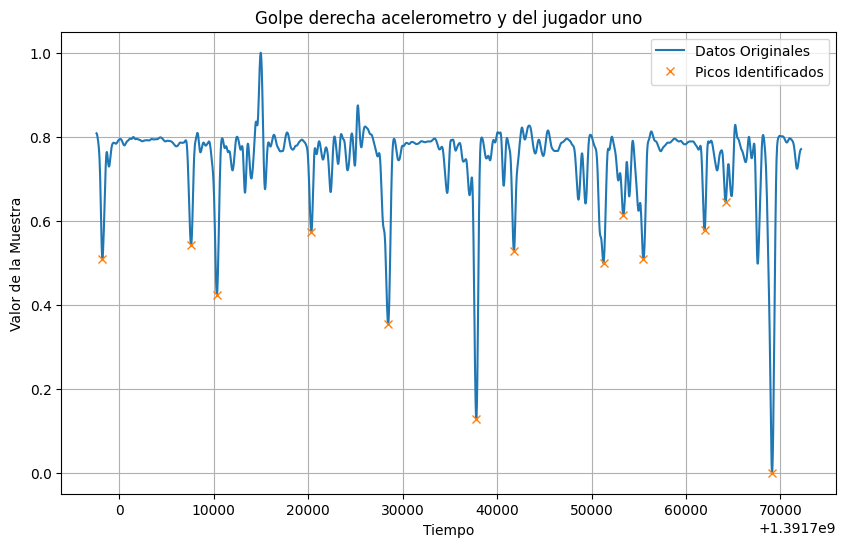

In [75]:
peaks = analyze_signal(array_vr, 'ACC_Z')

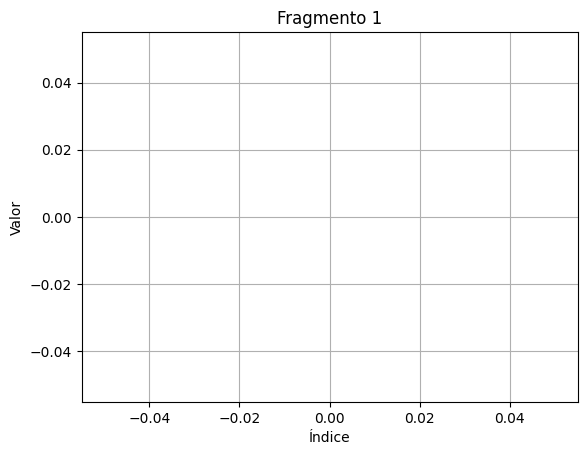

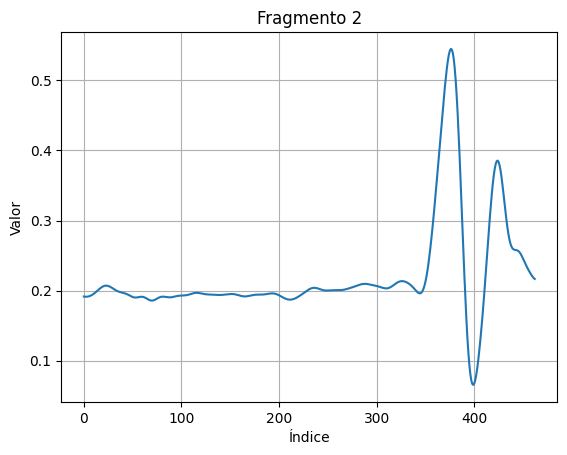

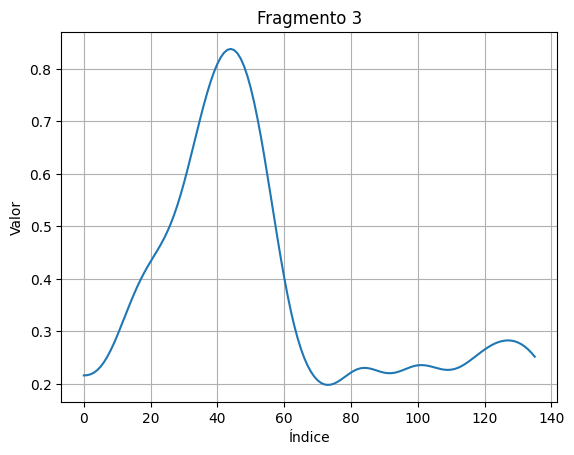

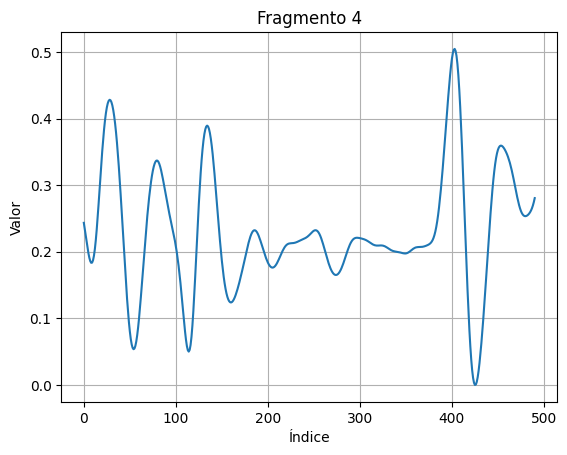

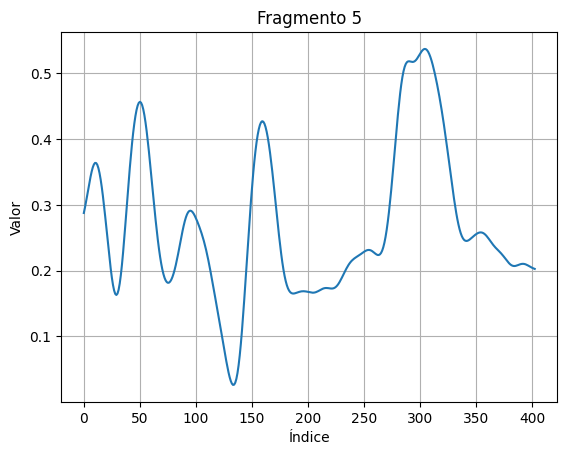

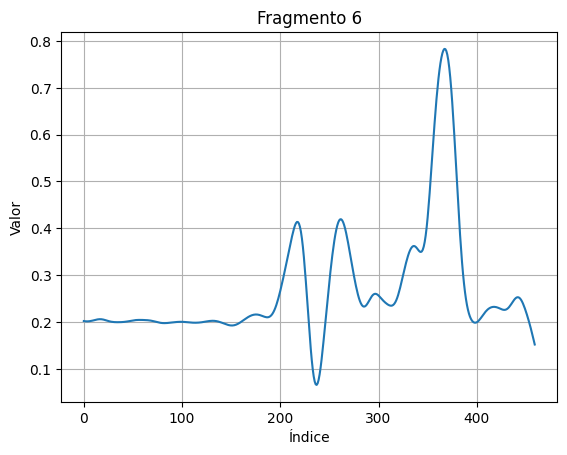

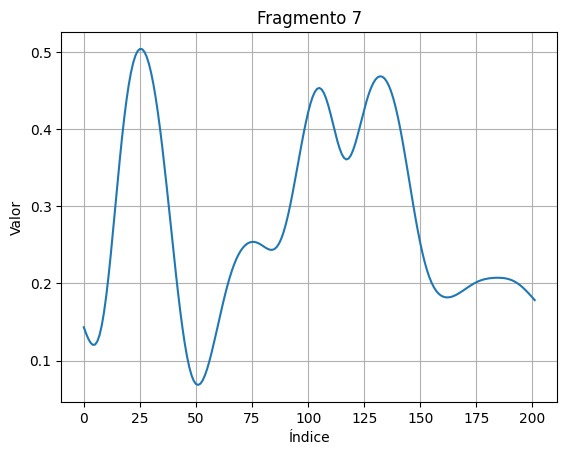

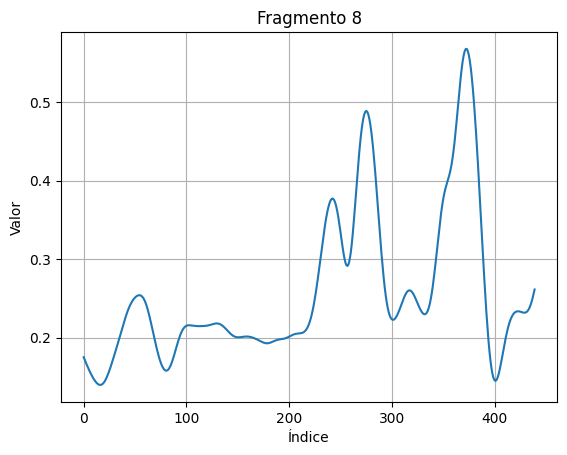

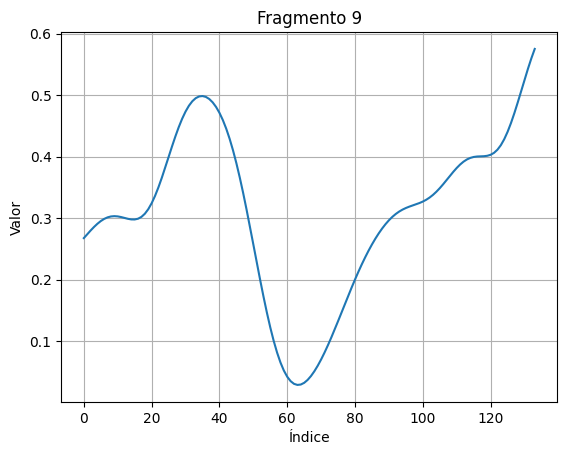

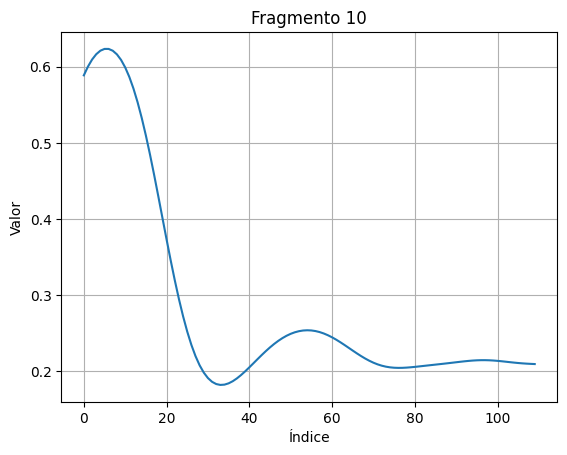

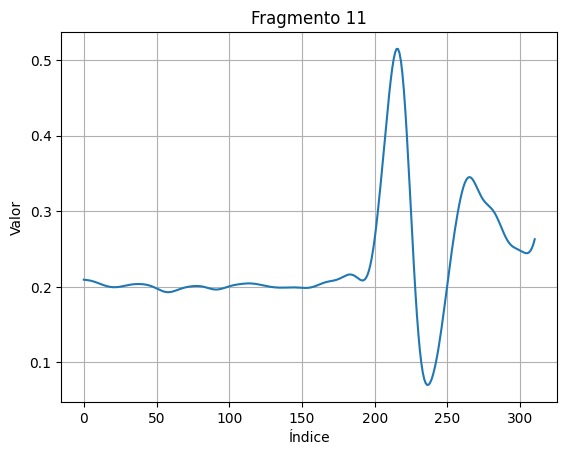

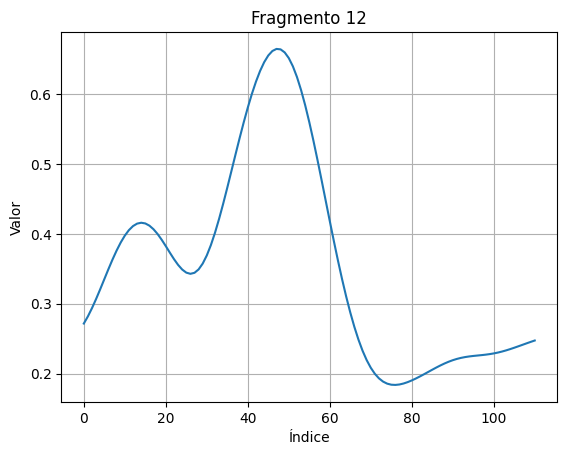

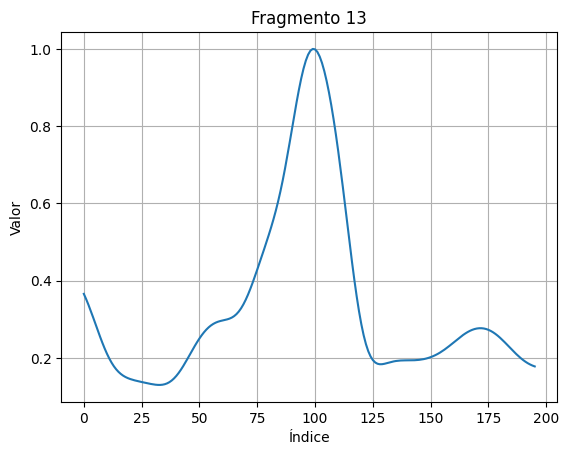

In [76]:
fragments = []

# Fragmentar la señal alrededor de cada pico y plotear cada fragmento
for i, peak_index in enumerate(peaks):
    print 
    if i == 0:
        start_index = peak_index - int(distances_between_peaks[i] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    elif i == len(peaks)-1:
        start_index = peak_index - int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i-1] / 2)
    else:
        start_index = peaks[i-1] + int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    fragment = array_vr[start_index:end_index]
    
    # Obtener la segunda columna de cada fragmento
    fragment_values = fragment['ACC_X']
    
    # Plotear el fragmento
    plt.figure()
    plt.plot(fragment_values)
    plt.title(f"Fragmento {i+1}")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()
    
    fragments.append(fragment)
    
    



In [77]:
# # Directorio donde se guardarán los archivos CSV
# directory = "C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/fragmentos"

# # Si el directorio no existe, créalo
# if not os.path.exists(directory):
#     os.makedirs(directory)

# # Itera sobre los fragmentos y guárdalos como archivos CSV
# for i, fragment in enumerate(fragments):
#     # Nombre del archivo CSV
#     filename = os.path.join(directory, f"vr_J1_{i+1}.csv")
    
#     # Abre el archivo CSV en modo escritura
#     with open(filename, mode='w', newline='') as file:
#         writer = csv.writer(file)
        
#         # Escribe los datos del fragmento en el archivo CSV
#         for row in fragment:
#             writer.writerow(row)